## Functions/Definitions

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [6, 4]

color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

def generate_lists(from_chr,till_chr):
    color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]
    #label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
    file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]

    
def plot_quality_distribution(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.xlabel("Quality")
        plt.ylabel("Count")
        plt.title("Full Distribution of Quality Scores")
        sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)

    #plt.legend()
    plt.show()

def plot_quality_scores_below_200(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.xlabel("Quality")
        plt.ylabel("Count")
        plt.title("Quality Scores below 200")
        qual_lt_400 = var_qual[var_qual["qual"] < 300] # create a new dataset with only "qual" values < 400
        plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
        mean_qual = np.mean(var_qual["qual"])

    plt.show()


def plot_quality_scores_along_chromosome(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.title("Quality Scores Along the Chromosome")
        
    plt.legend()
    plt.show()

def plot_quality_scores_along_chromosome2(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
        
        plt.plot(var_qual['pos'],var_qual['qual'])
        #plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.title("Quality Scores Along the Chromosome")
        
    plt.legend()
    plt.show()   


def plot_mean_depth(file_paths_gen, color_list,label_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,
                                names=["chr", "pos", "mean_depth", "var_depth"])
        sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3, label=label_list[i])
        plt.xlabel("Mean Depth")
        plt.ylabel("Count")
        plt.title("Mean Depth")
    plt.show()
    
    
def plot_depth_along_chromosome(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.title("Depth Along the Chromosome")
        
    plt.legend()
    plt.show()

def plot_mean_depth_100(file_paths_gen, color_list):    
    for i, file_path_gen in enumerate(file_paths_gen): 
        var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
        var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
        plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
        mean_depth = np.mean(var_depth["mean_depth"])
        #print(mean_depth)
        #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
        plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
        plt.xlabel("Mean Depth")
        plt.ylabel("Count")
        plt.title("Mean Depth below 200")
    plt.show() 
    
def plot_allele_frquency(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
        var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
        plt.xlabel("Allele Frequency")
        plt.ylabel("Count")
        plt.title("Distribution of Allele Frequency")
        plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
        mean_freq = np.mean(var_freq["maf"])
        #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
        plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
    plt.show()

def plot_minor_alleles(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
        var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
        plt.xlabel("Allele Frequency")
        plt.ylabel("Count")
        plt.title("Minor Allele Frequency")
        var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
        plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
    plt.show()

def plot_missing_sites(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
        plt.hist(var_miss["fmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
        plt.xlabel("Missingness")
        plt.ylabel("Count")
        plt.title("Missing Data")
    plt.show()

def plot_depth_per_indiv(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
        sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
        plt.xlabel("Mean Depth")
        plt.ylabel("Number of individuals")
        plt.title("Per Individual Depth")
    plt.show()

def plot_inbreding_coefficient(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                           names=["ind", "ho", "he", "nsites", "f"])
        plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
        plt.xlabel("f")
        plt.ylabel("Number of individuals")
        plt.title("Inbreeding coeficient")
    plt.show()


# Quality Control Melitaea britomartis

Distribution of quality scores for all autosomes merged

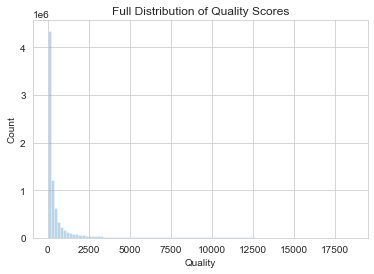

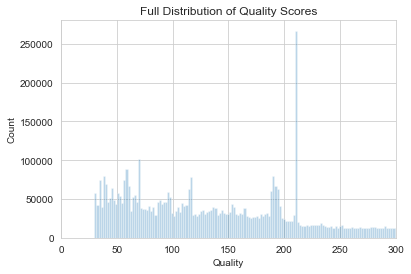

In [8]:
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
file_path_gen="/Users/dshipilina/britomartis_all_mcaller.miss20."
#def plot_quality_distribution(file_paths_gen, color_list):
    #for i, file_path_gen in enumerate(file_paths_gen):
var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1, names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
#sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)
plt.hist(data=var_qual, x="qual", fill=True,alpha=0.3, bins=100) #, color=color_list[i], alpha=0.3)

plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qual.pdf",bbox_inches="tight")
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)

    #plt.legend()
plt.show()

plt.hist(data=var_qual, x="qual", fill=True,alpha=0.3, bins=10000) #, color=color_list[i], alpha=0.3)
plt.xlim(0,300)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
    #plt.legend()
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qualzoom.pdf",bbox_inches="tight")
    
plt.show()


#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qual.pdf",bbox_inches="tight")
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)


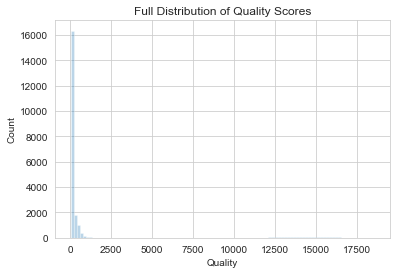

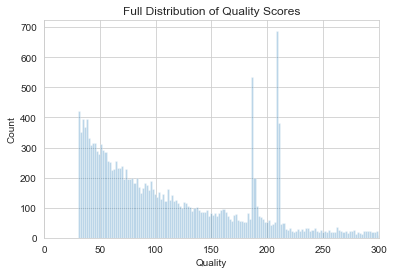

In [10]:
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
file_path_gen="/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/CallingQC/britomartis_all_mcaller.HQ.miss0.GQfilteredNPASS.site-quality."
#/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/CallingQC/britomartis_all_mcaller.HQ.miss0.GQfilteredNPASS.site-quality.lqual
#def plot_quality_distribution(file_paths_gen, color_list):
    #for i, file_path_gen in enumerate(file_paths_gen):
var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1, names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
#sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)
plt.hist(data=var_qual, x="qual", fill=True,alpha=0.3, bins=100) #, color=color_list[i], alpha=0.3)

#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qual.pdf",bbox_inches="tight")
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)

    #plt.legend()
plt.show()

plt.hist(data=var_qual, x="qual", fill=True,alpha=0.3, bins=10000) #, color=color_list[i], alpha=0.3)
plt.xlim(0,300)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
    #plt.legend()
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qualzoom.pdf",bbox_inches="tight")
    
plt.show()


#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qual.pdf",bbox_inches="tight")
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)


In [22]:
var_qual

,chr,pos,qual
0,HG992177.1,24458,143.1380
1,HG992177.1,24465,45.8644
2,HG992177.1,24466,205.7780
3,HG992177.1,53851,7795.1600
4,HG992177.1,53853,69.2999
...,...,...,...
8419513,HG992208.2,15108,197.0660
8419514,HG992208.2,15121,187.1010
8419515,HG992208.2,15142,187.2770
8419516,HG992208.2,15145,187.2770


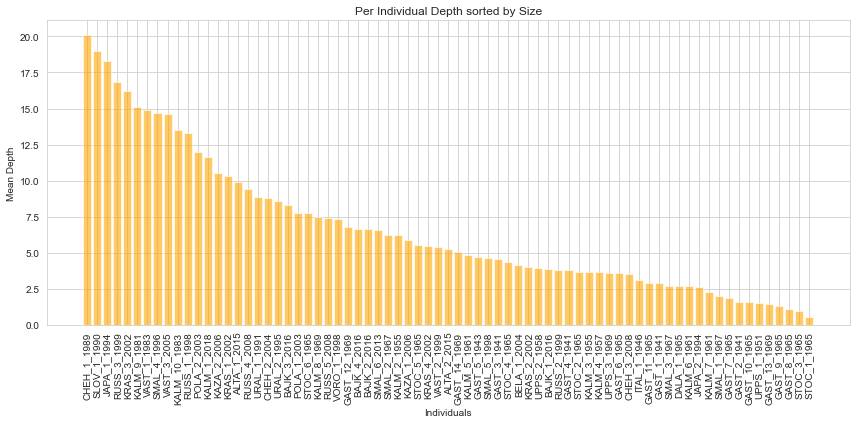

BAJK_1_2016
KRAS_2_2002
CHEH_3_2008
JAPA_2_1994
RUSS_2_1999
GAST_6_1965
UPPS_1_1951
KALM_3_1955
GAST_4_1941
GAST_2_1941
UPPS_3_1969
KALM_7_1961
GAST_10_1965
STOC_2_1965
GAST_7_1965
GAST_11_1965
STOC_3_1965
DALA_1_1965
SMAL_3_1967
KALM_6_1961
GAST_13_1969
GAST_1_1941
GAST_8_1965
GAST_9_1965
SMAL_1_1967
STOC_1_1965
KALM_4_1957
ITAL_1_1946
UPPS_2_1958


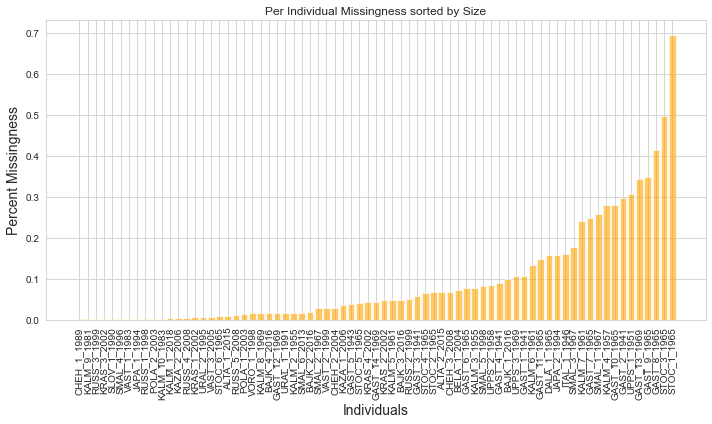

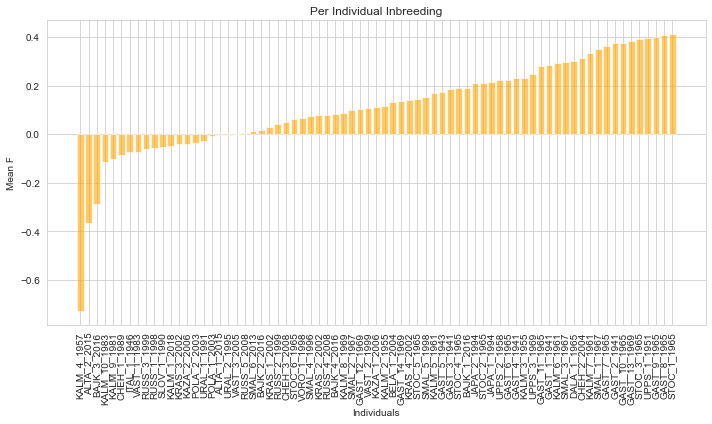

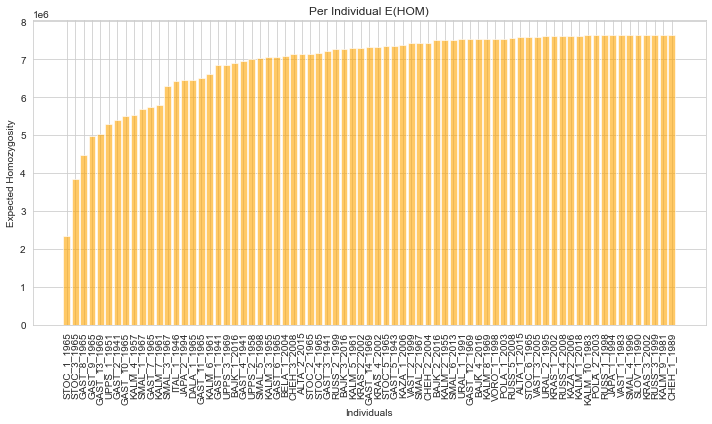

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

# Reading the data
ind_depth = pd.read_csv(file_path_gen + "idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])

# Modify 'ind' column to remove redundancy
ind_depth["ind"] = ind_depth["ind"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="depth", ascending=False)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["ind"], ind_depth_sorted["depth"], color='orange',alpha=0.6)
plt.ylabel("Mean Depth")
plt.xlabel("Individuals")
plt.title("Per Individual Depth sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap

plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.dpthind.pdf",bbox_inches="tight")
plt.show()

for i, depth_value in enumerate(ind_depth["depth"]):
    if depth_value < 4:
        print(ind_depth["ind"][i])

        
plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='orange',alpha=0.6)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.pdf",bbox_inches="tight")
plt.show()


plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F"],color='orange',alpha=0.6)
plt.ylabel("Mean F")
plt.xlabel("Individuals")
plt.title("Per Individual Inbreeding")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.inbr.pdf",bbox_inches="tight")
plt.show()


plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="E(HOM)", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["E(HOM)"],color='orange',alpha=0.6)
plt.ylabel("Expected Homozygosity")
plt.xlabel("Individuals")
plt.title("Per Individual E(HOM)")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.heter.pdf",bbox_inches="tight")
plt.show()

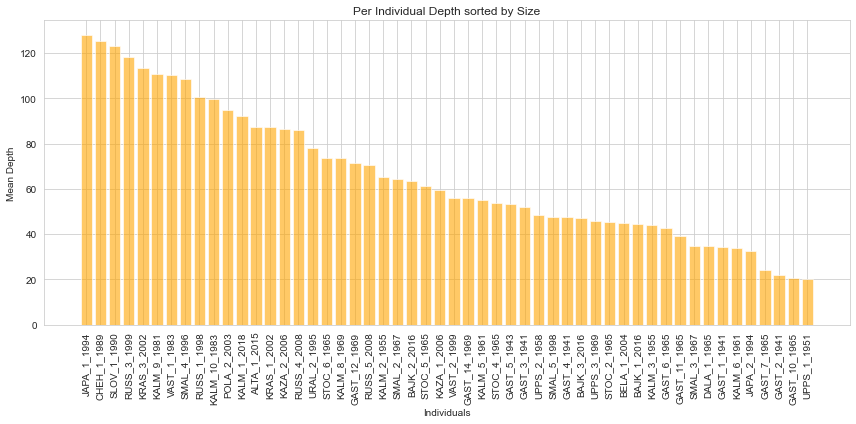

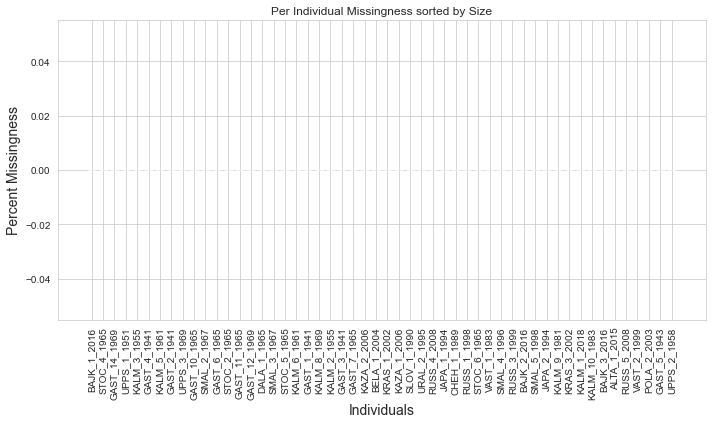

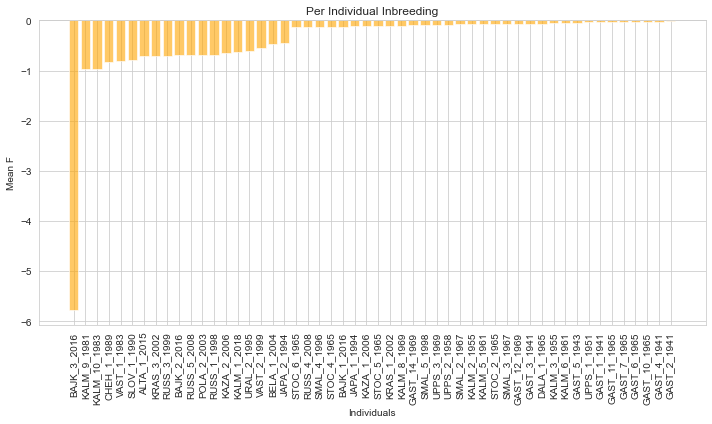

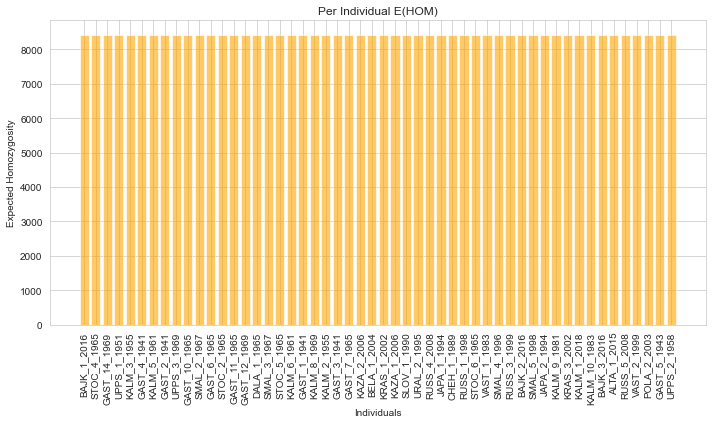

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_gen="/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/CallingQC/britomartis_all_mcaller.HQ.miss0.GQfilteredNPASS."

plt.figure(figsize=(12, 6))

# Reading the data
ind_depth = pd.read_csv(file_path_gen + "idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])

# Modify 'ind' column to remove redundancy
ind_depth["ind"] = ind_depth["ind"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="depth", ascending=False)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["ind"], ind_depth_sorted["depth"], color='orange',alpha=0.6)
plt.ylabel("Mean Depth")
plt.xlabel("Individuals")
plt.title("Per Individual Depth sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap

#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.dpthind.pdf",bbox_inches="tight")
plt.show()

for i, depth_value in enumerate(ind_depth["depth"]):
    if depth_value < 4:
        print(ind_depth["ind"][i])

        
plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='orange',alpha=0.6)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.pdf",bbox_inches="tight")
plt.show()


plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F"],color='orange',alpha=0.6)
plt.ylabel("Mean F")
plt.xlabel("Individuals")
plt.title("Per Individual Inbreeding")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
plt.ylim()
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.inbr.pdf",bbox_inches="tight")
plt.show()


plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="E(HOM)", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["E(HOM)"],color='orange',alpha=0.6)
plt.ylabel("Expected Homozygosity")
plt.xlabel("Individuals")
plt.title("Per Individual E(HOM)")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.heter.pdf",bbox_inches="tight")
plt.show()

In [17]:
ind_depth = pd.read_csv(file_path_gen + "idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])

# Modify 'ind' column to remove redundancy
ind_depth["ind"] = ind_depth["ind"].apply(lambda x: "_".join(x.split("_")[:3]))



for i, depth_value in enumerate(ind_depth["depth"]):
    if depth_value < 3:
        print(ind_depth["ind"][i],depth_value)

JAPA_2_1994 2.62886
UPPS_1_1951 1.48796
GAST_2_1941 1.6006
KALM_7_1961 2.25957
GAST_10_1965 1.56229
GAST_7_1965 1.81825
GAST_11_1965 2.91104
STOC_3_1965 0.960228
DALA_1_1965 2.65588
SMAL_3_1967 2.71023
KALM_6_1961 2.65386
GAST_13_1969 1.40341
GAST_1_1941 2.87744
GAST_8_1965 1.10823
GAST_9_1965 1.31725
SMAL_1_1967 1.97408
STOC_1_1965 0.520048


In [35]:
ind_depth

,ind,nsites,depth
0,BAJK_1_2016_BAJK_1_2016,8419518,3.84525
1,KAZA_1_2006_KAZA_1_2006,8419518,5.84948
2,SLOV_1_1990_SLOV_1_1990,8419518,18.99780
3,URAL_2_1995_URAL_2_1995,8419518,8.59179
4,RUSS_4_2008_RUSS_4_2008,8419518,9.40172
...,...,...,...
68,KALM_4_1957_KALM_4_1957,8419518,3.63837
69,GAST_3_1941_GAST_3_1941,8419518,4.56751
70,ITAL_1_1946_ITAL_1_1946,8419518,3.06773
71,GAST_5_1943_GAST_5_1943,8419518,4.71788


No handles with labels found to put in legend.


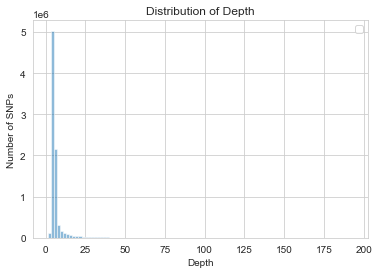

count    8.419518e+06
mean     6.681912e+00
std      6.994799e+00
min      1.547950e+00
25%      4.630140e+00
50%      5.136990e+00
75%      5.835620e+00
max      1.929180e+02
Name: MEAN_DEPTH, dtype: float64


In [25]:
var_qual = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,
                               names=["CHROM","POS","MEAN_DEPTH","VAR_DEPTH"])
var_qual = var_qual[var_qual["MEAN_DEPTH"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["MEAN_DEPTH"], how="any")

plt.hist(var_qual['MEAN_DEPTH'], fill=True, alpha=0.5, bins=100)
plt.xlabel("Depth")
plt.ylabel("Number of SNPs")
plt.title("Distribution of Depth")
        
plt.legend()
plt.show()

print(var_qual['MEAN_DEPTH'].describe())

In [52]:
var_qual

,chr,pos,qual
HG992177.1,24458,14.0411,715.262
HG992177.1,24465,12.8630,683.870
HG992177.1,24466,11.4110,709.301
HG992177.1,53851,10.7260,213.063
HG992177.1,53853,11.1096,220.016
...,...,...,...
HG992208.2,15108,165.6030,4550.300
HG992208.2,15121,171.3420,5393.920
HG992208.2,15142,147.9590,4368.510
HG992208.2,15145,142.9320,4099.980


<Figure size 720x432 with 0 Axes>

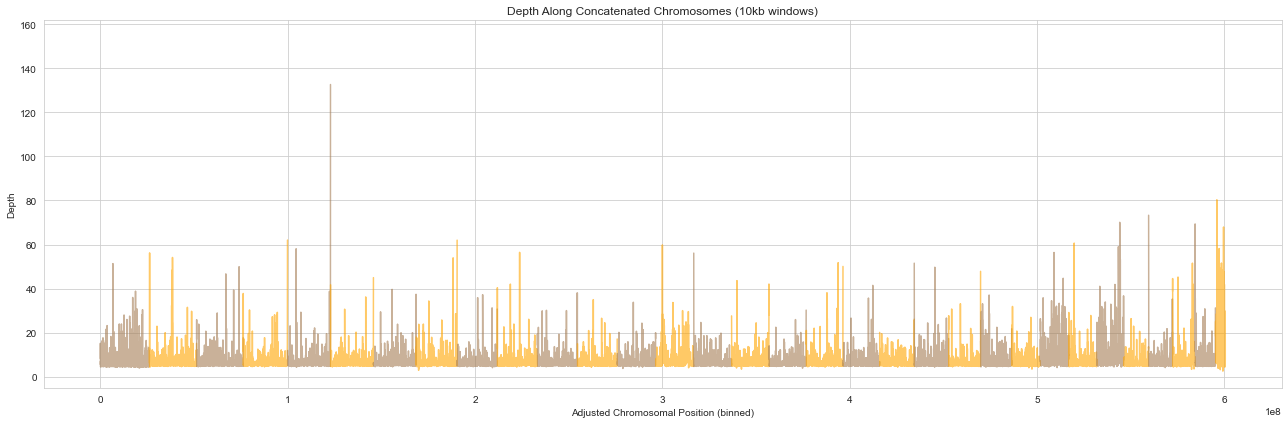

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Define window size
window_size = 30000

# Compute the bin number for each position
var_qual['BIN'] = (var_qual['POS'] // window_size) + 1

# Compute statistics for each bin (here: mean depth for each window)
binned_data = var_qual.groupby(['CHROM', 'BIN']).agg({
    'MEAN_DEPTH': 'mean',
    'VAR_DEPTH': 'mean'
}).reset_index()

# You can also compute the start and end of each bin for plotting purposes
binned_data['BIN_START'] = (binned_data['BIN'] - 1) * window_size + 1
binned_data['BIN_END'] = binned_data['BIN'] * window_size

# Compute the adjusted position for concatenated chromosomes
offsets = binned_data.groupby('CHROM')['BIN_END'].max().cumsum()
offsets = offsets.shift(1).fillna(0).to_dict()
binned_data['ADJUSTED_POS'] = binned_data.apply(lambda row: row['BIN_START'] + offsets[row['CHROM']], axis=1)

plt.figure(figsize=(18, 6))

# For alternating colors, assign a color to each chromosome
chromosomes = binned_data['CHROM'].unique()
colors = {chrom: ('#A57E56' if i % 2 == 0 else 'orange') for i, chrom in enumerate(chromosomes)}

#plt.figure(figsize=(12, 6))

# Plot MEAN_DEPTH or VAR_DEPTH along the adjusted positions with alternating colors
for chrom in chromosomes:
    subset = binned_data[binned_data['CHROM'] == chrom]
    plt.plot(subset['ADJUSTED_POS'], subset['MEAN_DEPTH'], label=f'MEAN_DEPTH {chrom}', color=colors[chrom],alpha=0.6) # marker='o')
    #plt.plot(subset['ADJUSTED_POS'], subset['VAR_DEPTH'], label=f'VAR_DEPTH {chrom}', color=colors[chrom], marker='o', alpha=0.5)

plt.xlabel('Adjusted Chromosomal Position (binned)')
plt.ylabel('Depth')
plt.title('Depth Along Concatenated Chromosomes (10kb windows)')
#plt.legend()
plt.tight_layout()
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.depthchrom.pdf",bbox_inches="tight")
plt.show()


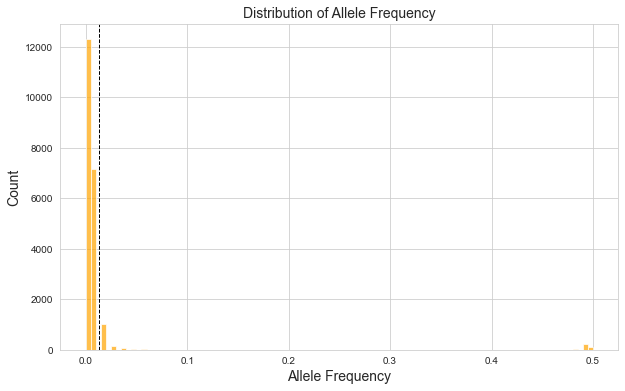

In [12]:
plt.figure(figsize=(10, 6))
var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
plt.xlabel("Allele Frequency", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.title("Distribution of Allele Frequency",fontsize=14)
plt.hist(var_freq["maf"], fill=True, color='orange',alpha=0.7, bins=100)
mean_freq = np.mean(var_freq["maf"])
        #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.allelefrq.pdf",bbox_inches="tight")
plt.show()

In [3]:
with open("athalia_britomart_NCBI_selection.fasta", "r") as infile:
    sequence = ""
    chromosome = ""
    for line in infile:
        if line.startswith(">"):
            if sequence:
                start = None
                for i, base in enumerate(sequence):
                    if base.islower() and start is None:
                        start = i
                    elif base.isupper() and start is not None:
                        end = i
                        print(f"{chromosome}\t{start}\t{end}")
                        start = None
            chromosome = line.strip().split()[0][1:]
            sequence = ""
        else:
            sequence += line.strip()

athalia|HQ004750.1	372	386


In [87]:
var_freq["maf"]

0          0.039683
1          0.053846
2          0.038462
3          0.428571
4          0.007812
             ...   
8419513    0.006849
8419514    0.013699
8419515    0.013699
8419516    0.013699
8419517    0.041096
Name: maf, Length: 8419518, dtype: float64

Distribution of quality scores for Z vs chrom 1

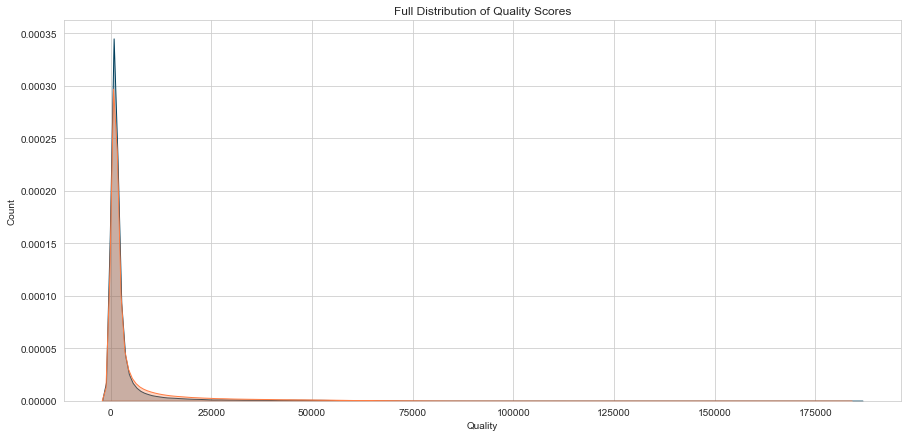

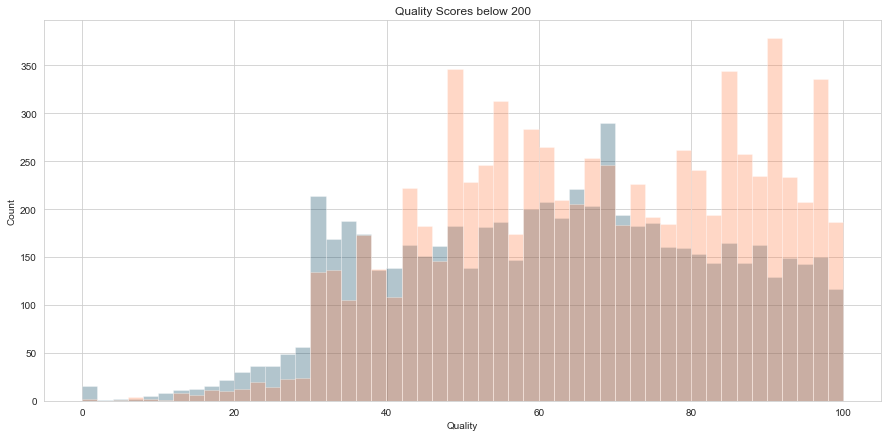

In [76]:
from_chr=24
till_chr=25
file_paths_gen=file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_distribution(file_paths_gen, color_list)
plot_quality_scores_below_200(file_paths_gen, color_list)

Quality and depth gap evaluation

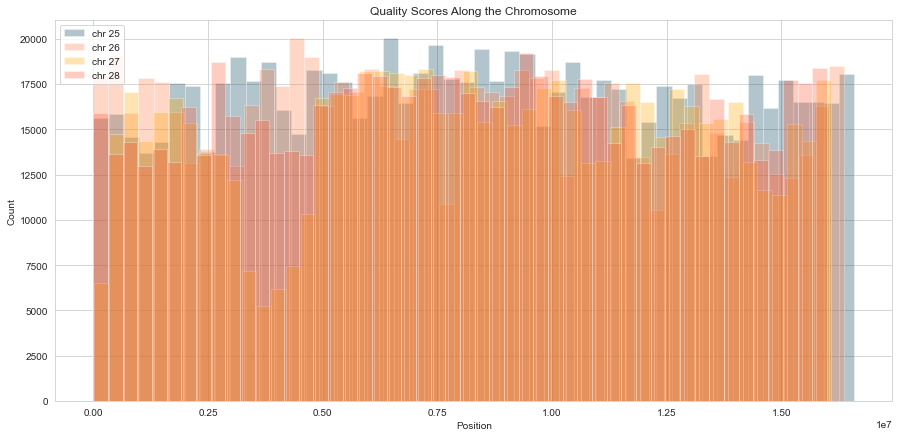

In [82]:
from_chr=25
till_chr=28
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

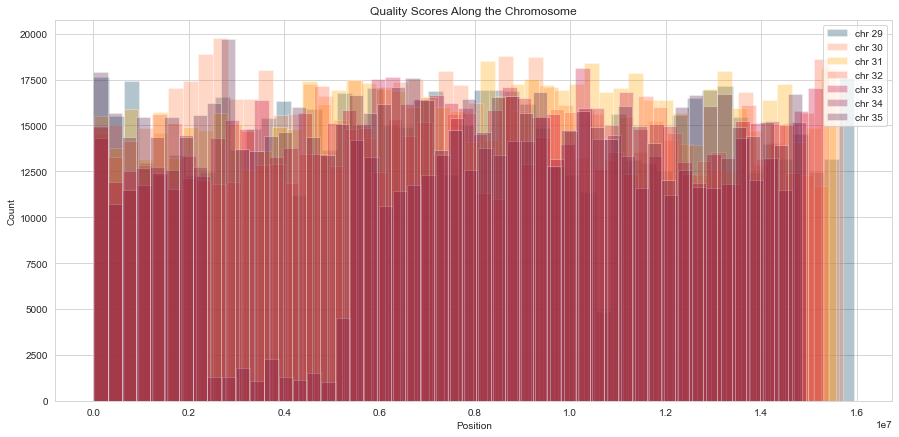

In [85]:
from_chr=29
till_chr=35
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

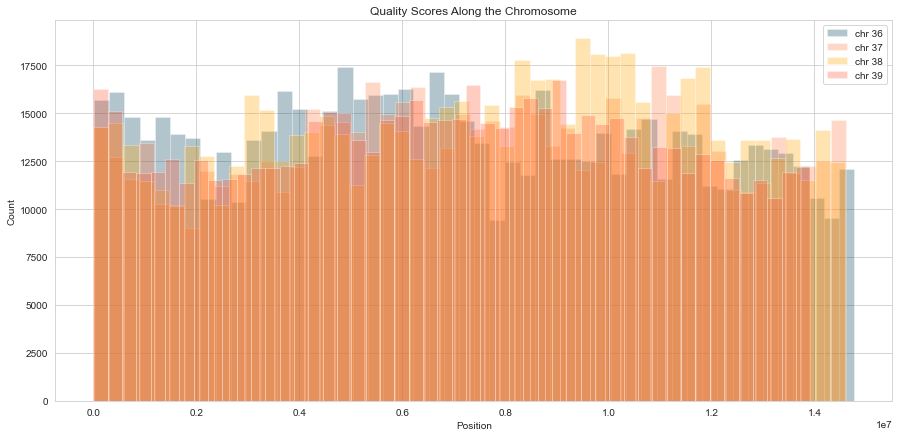

In [86]:
from_chr=36
till_chr=39
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

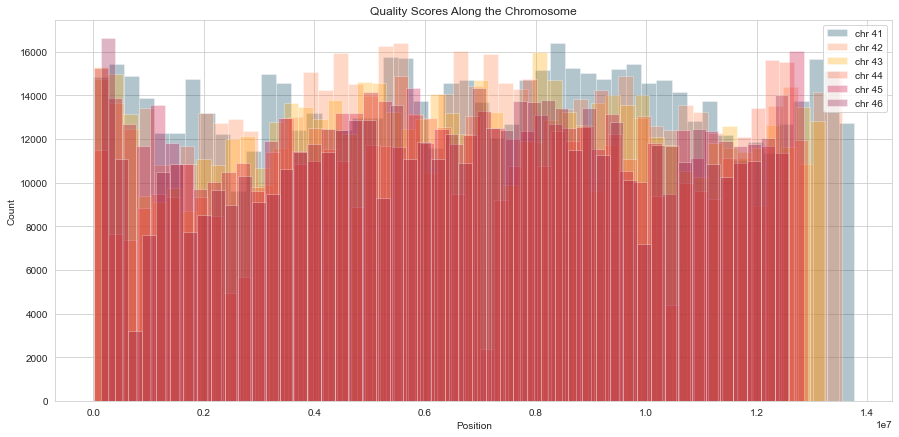

In [87]:
from_chr=41
till_chr=46
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

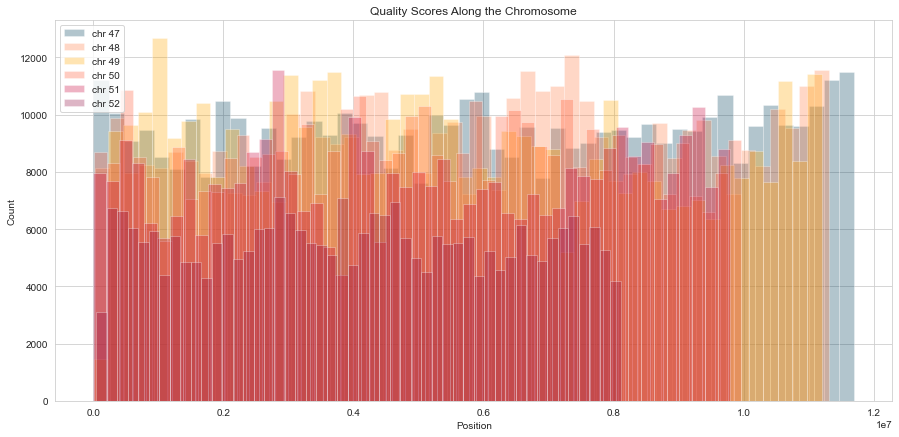

In [88]:
from_chr=47
till_chr=52
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

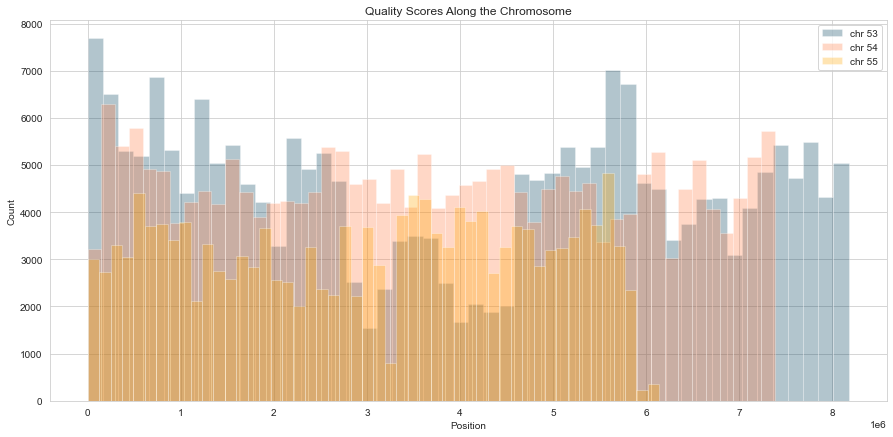

In [90]:
from_chr=53
till_chr=55
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

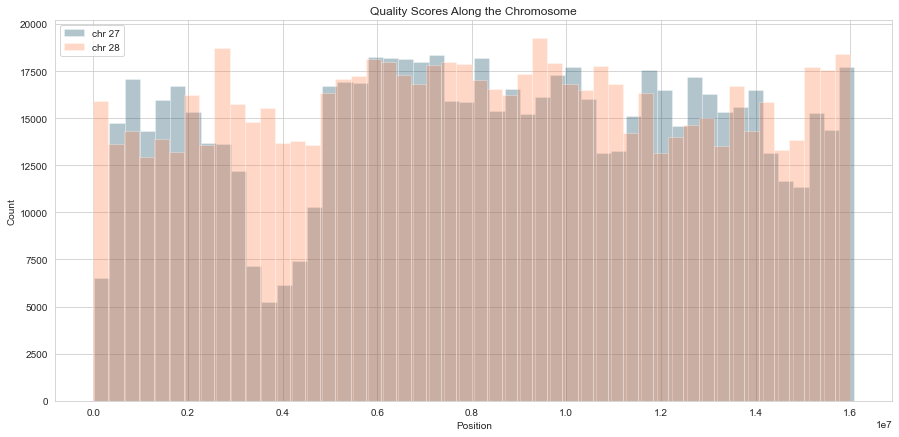

No handles with labels found to put in legend.


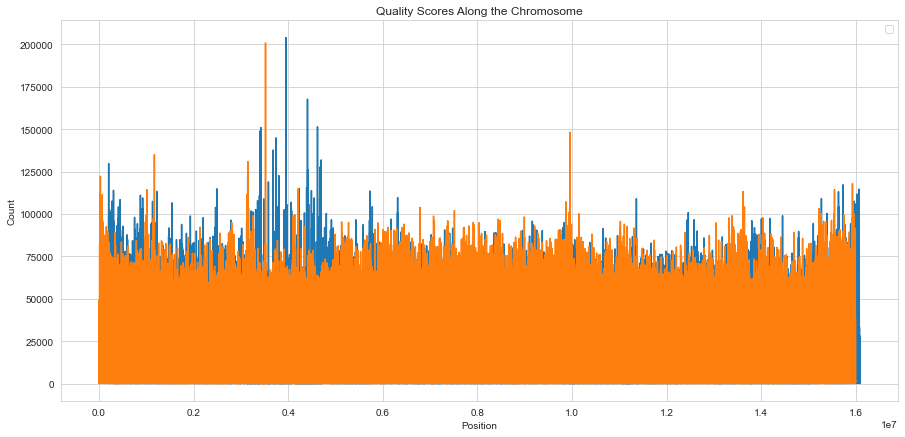

In [19]:
from_chr=27
till_chr=28
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)
plot_quality_scores_along_chromosome2(file_paths_gen, color_list)

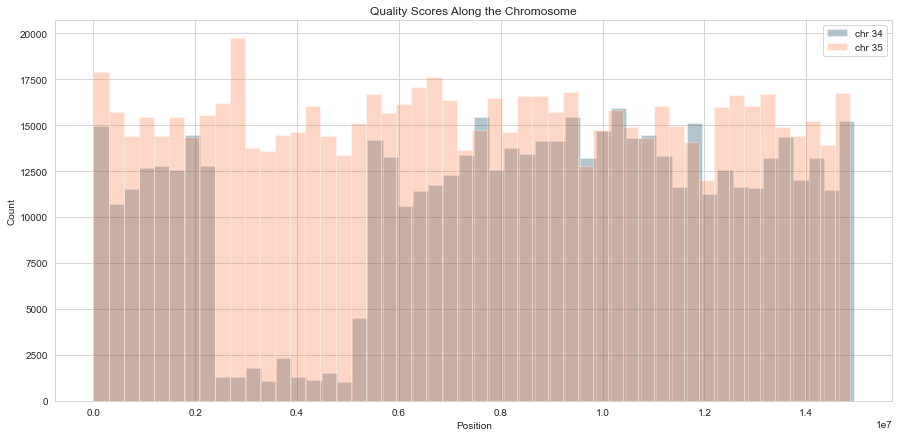

In [16]:
from_chr=34
till_chr=35
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

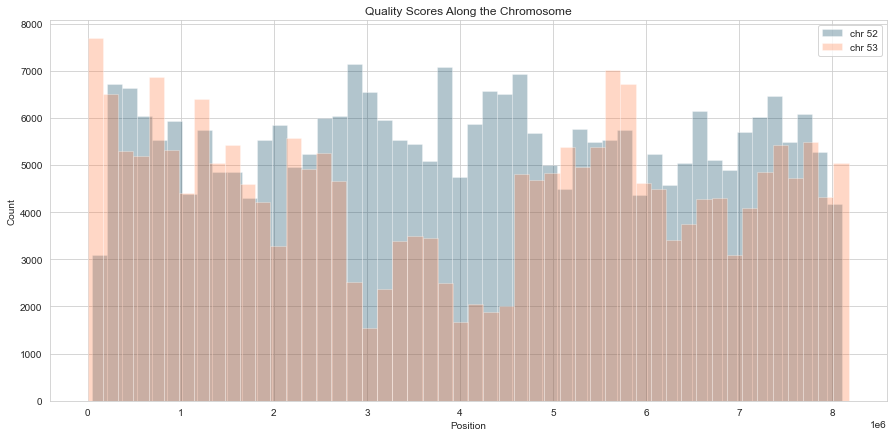

In [93]:
from_chr=52
till_chr=53
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

### Depth difference discovery

No handles with labels found to put in legend.


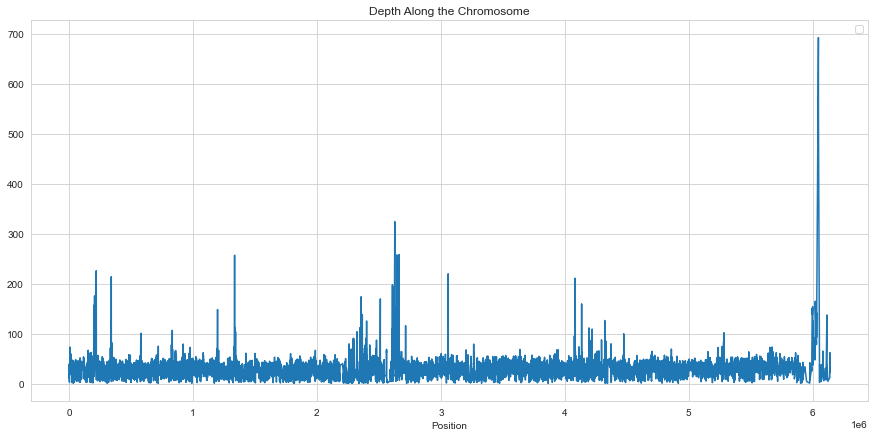

In [5]:
def plot_depth_along_chromosome(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,
                               names=["chr", "pos", "mean_depth", "var_depth"])
        #var_qual = var_qual[var_qual["qual"] != -1]
        #var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.plot(var_qual['pos'],var_qual['mean_depth'])
        #plt.plot(var_qual['pos'],var_qual['var_depth'])
        #plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("")
        plt.title("Depth Along the Chromosome")
        
    plt.legend()
    plt.show()

    
from_chr=55
till_chr=55

file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]    
plot_depth_along_chromosome(file_paths_gen, color_list)

# Development

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

#file_paths = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.lqual",
#"/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant.lqual"]

#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.","/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant."]

from_chr=27
till_chr=28
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
 
#List of colors to be used for each plot
color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

# List of labels for each plot
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Full Distribution of Quality Scores")
    sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3,label=label_list[i])

plt.legend()
plt.show()

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Quality Scores below 200")
    qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_qual = np.mean(var_qual["qual"])
    
plt.show()

for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50)
    plt.xlabel("Position")
    plt.ylabel("Count")
    plt.title("Quality Scores Along the Chromosome")
plt.show()    
    
for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth")
plt.show() 

for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_depth = np.mean(var_depth["mean_depth"])
    #print(mean_depth)
    #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth below 200")
plt.show() 


for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Distribution of Allele Frequency")
    plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
    mean_freq = np.mean(var_freq["maf"])
    #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Minor Allele Frequency")
    var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
    plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
    plt.hist(var_miss["fmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
    plt.xlabel("Missingness")
    plt.ylabel("Count")
    plt.title("Missing Data")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
    sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Number of individuals")
    plt.title("Per Individual Depth")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])
    plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
    plt.xlabel("f")
    plt.ylabel("Number of individuals")
    plt.title("Inbreeding coeficient")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files
var_qual = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.lqual", sep="\t", skiprows=1,
                        names=["chr", "pos", "qual"])

var_depth = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.ldepth.mean", sep="\t", skiprows=1,
                         names=["chr", "pos", "mean_depth", "var_depth"])

var_miss = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.lmiss", sep="\t", skiprows=1,
                        names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])

var_freq = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.frq", sep="\t", skiprows=1,
                        names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])

ind_depth = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.idepth", sep="\t", skiprows=1,
                         names=["ind", "nsites", "depth"])

ind_miss = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.imiss", sep="\t", skiprows=1,
                        names=["ind", "ndata", "nfiltered", "nmiss", "fmiss"])

ind_het = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])

# Plotting the data using seaborn and matplotlib
sns.set_style("whitegrid")

sns.kdeplot(data=var_qual, x="qual", fill=True, color="dodgerblue", alpha=0.3)
plt.show()

sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color="dodgerblue", alpha=0.3)
plt.show()

print(var_depth["mean_depth"].describe())

sns.kdeplot(data=var_miss, x="fmiss", fill=True, color="dodgerblue", alpha=0.3)
plt.show()

var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
sns.kdeplot(data=var_freq, x="maf", fill=True, color="dodgerblue", alpha=0.3)
plt.show()

sns.histplot(data=ind_depth, x="depth", bins=20, color="dodgerblue", alpha=0.3)
plt.show()

sns.histplot(data=ind_miss, x="fmiss", bins=20, color="dodgerblue", alpha=0.3)
plt.show()

sns.histplot(data=ind_het, x="f", bins=20, color="dodgerblue", alpha=0.3)
plt.show()


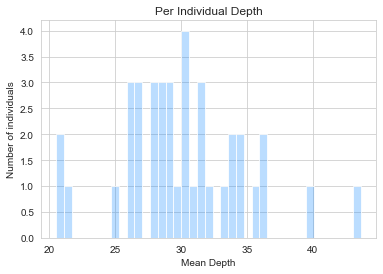

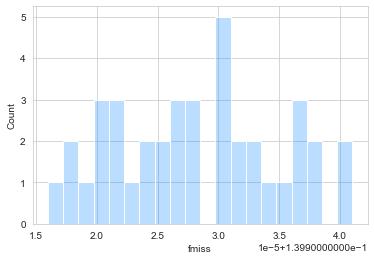

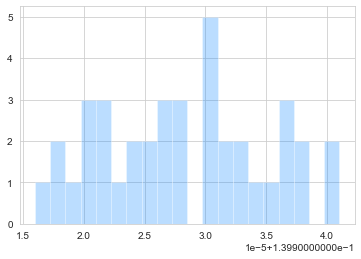

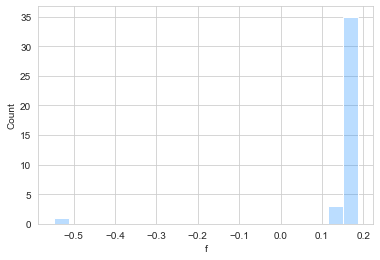

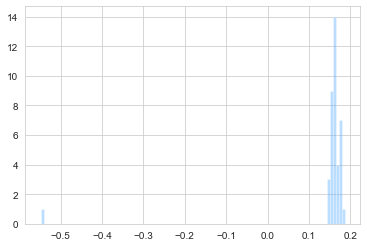

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files

ind_depth = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.idepth", sep="\t", skiprows=1,
                         names=["ind", "nsites", "depth"])

ind_miss = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.imiss", sep="\t", skiprows=1,
                        names=["ind", "ndata", "nfiltered", "nmiss", "fmiss"])

ind_het = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])

# Plotting the data using seaborn and matplotlib
sns.set_style("whitegrid")


sns.histplot(data=ind_depth, x="depth", bins=39, color="dodgerblue", alpha=0.3)
plt.xlabel("Mean Depth")
plt.ylabel("Number of individuals")
plt.title("Per Individual Depth")
plt.show()

sns.histplot(data=ind_miss, x="fmiss", bins=20, color="dodgerblue", alpha=0.3)
plt.show()

plt.hist(ind_miss["fmiss"], bins=20, color="dodgerblue", alpha=0.3)
plt.show()

sns.histplot(data=ind_het, x="f", bins=20, color="dodgerblue", alpha=0.3)
plt.show()

plt.hist(ind_het["f"], bins=100, color="dodgerblue", alpha=0.3)
plt.xlabel("Mean Depth")
plt.ylabel("Number of individuals")
plt.title("Inbreeding coeficient")
plt.show()


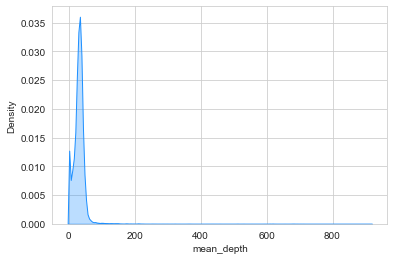

count    1.782183e+06
mean     3.008788e+01
std      2.182820e+01
min      0.000000e+00
25%      2.143590e+01
50%      3.028210e+01
75%      3.738460e+01
max      9.161030e+02
Name: mean_depth, dtype: float64


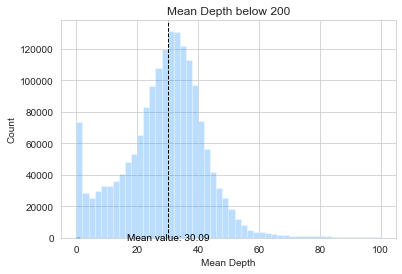

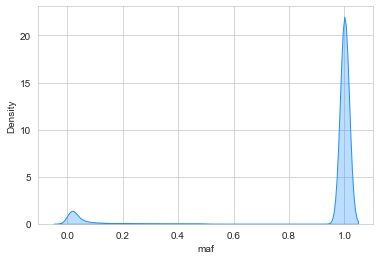

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files
var_depth = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.ldepth.mean", sep="\t", skiprows=1,
                         names=["chr", "pos", "mean_depth", "var_depth"])

var_miss = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.lmiss", sep="\t", skiprows=1,
                        names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])

var_freq = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.frq", sep="\t", skiprows=1,
                        names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])


# Plotting the data using seaborn and matplotlib


sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color="dodgerblue", alpha=0.3)
plt.show()

plt.xlabel("Mean Depth")
plt.ylabel("Count")
plt.title("Mean Depth below 200")
var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
plt.hist(var_depth_400["mean_depth"], fill=True, color="dodgerblue", alpha=0.3, bins=50)
mean_depth = np.mean(var_depth["mean_depth"])
plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
plt.axvline(mean_depth, color="black", linestyle="dashed", linewidth=1)


print(var_depth["mean_depth"].describe())

sns.kdeplot(data=var_miss, x="fmiss", fill=True, color="dodgerblue", alpha=0.3)
plt.show()

var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
sns.kdeplot(data=var_freq, x="maf", fill=True, color="dodgerblue", alpha=0.3)
plt.show()


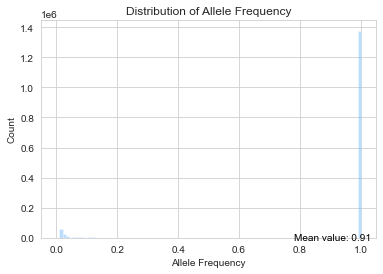

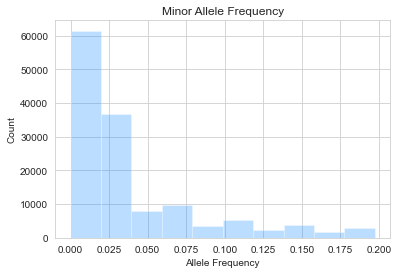

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files

var_freq = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.frq", sep="\t", skiprows=1,
                        names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])


# Plotting the data using seaborn and matplotlib

var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
#sns.kdeplot(data=var_freq, x="maf", fill=True, color="dodgerblue", alpha=0.3)
#plt.show()

plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency")
plt.hist(var_freq["maf"], fill=True, color="dodgerblue", alpha=0.3, bins=100)
mean_freq = np.mean(var_freq["maf"])
plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")

plt.show()

plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Minor Allele Frequency")
var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
plt.hist(var_freq_sm["maf"], fill=True, color="dodgerblue", alpha=0.3)
mean_freq = np.mean(var_freq["maf"])
plt.show()



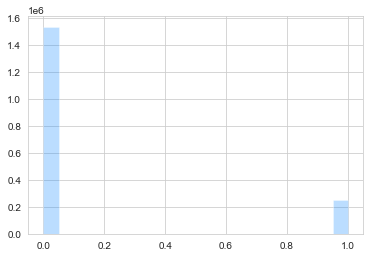

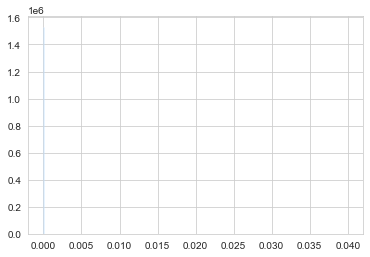

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files
var_depth = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.ldepth.mean", sep="\t", skiprows=1,
                         names=["chr", "pos", "mean_depth", "var_depth"])

var_miss = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.lmiss", sep="\t", skiprows=1,
                        names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])


# Plotting the data using seaborn and matplotlib


plt.hist(var_miss["fmiss"], fill=True, color="dodgerblue", alpha=0.3,bins=20)
plt.show()

var_miss_400 = var_miss[var_miss["fmiss"] < 0.05] # create a new dataset with only "qual" values < 400
plt.hist(var_miss_400["fmiss"], fill=True, color="dodgerblue", alpha=0.3, bins=1000)
#mean_depth = np.mean(var_depth["mean_depth"])
#plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
#plt.axvline(mean_depth, color="black", linestyle="dashed", linewidth=1)
plt.show()

#plt.hist(var_miss["nmiss"], fill=True, color="dodgerblue", alpha=0.3,bins=100)
#plt.show()
#plt.hist(var_miss["nfiltered"], fill=True, color="dodgerblue", alpha=0.3,bins=100)
#plt.show()
#var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
#sns.kdeplot(data=var_freq, x="maf", fill=True, color="dodgerblue", alpha=0.3)
#plt.show()


### Polished

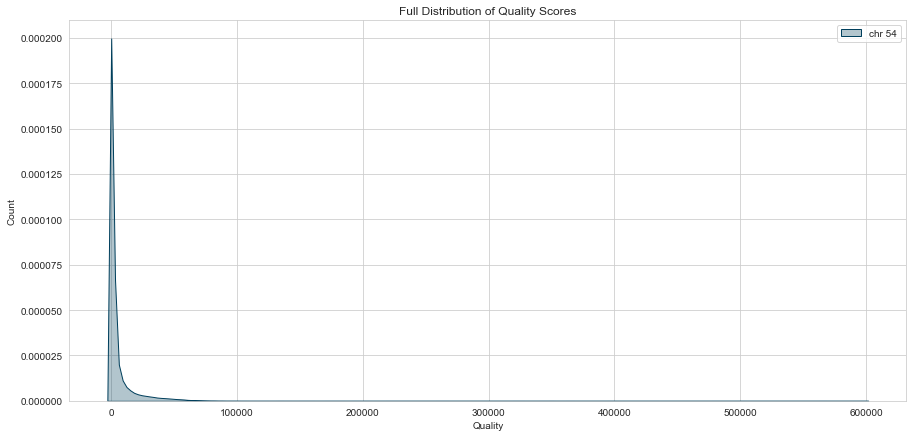

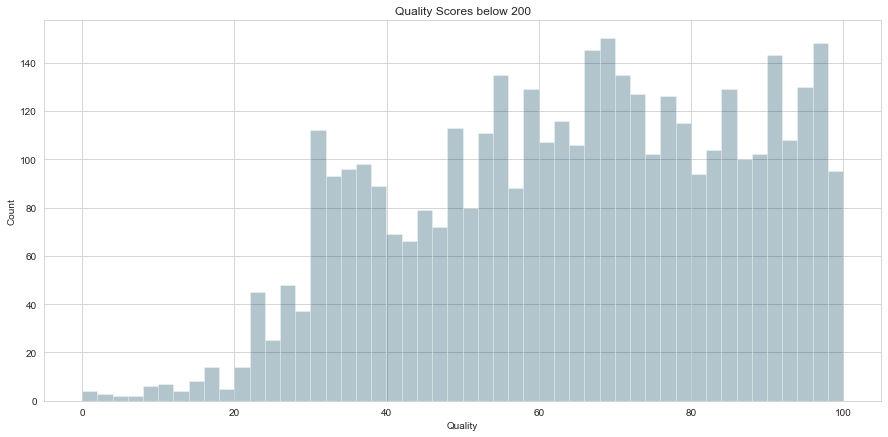

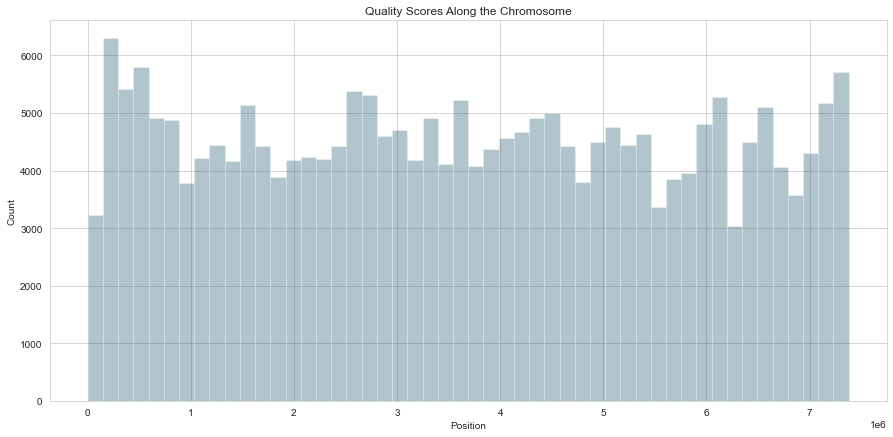

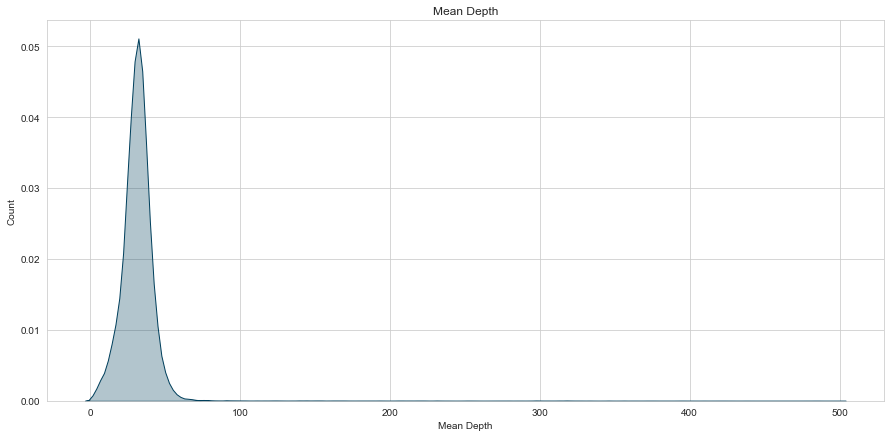

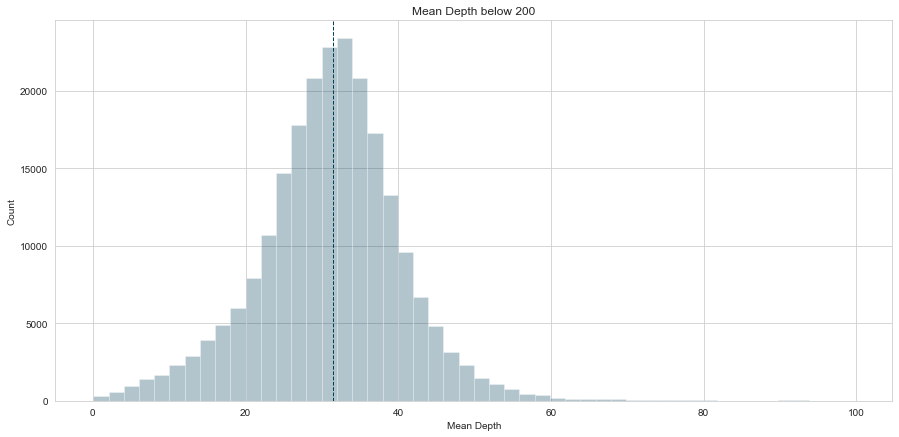

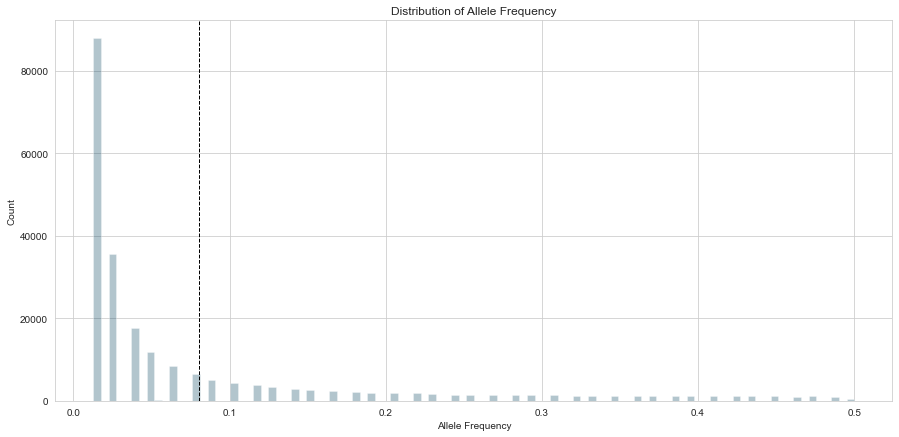

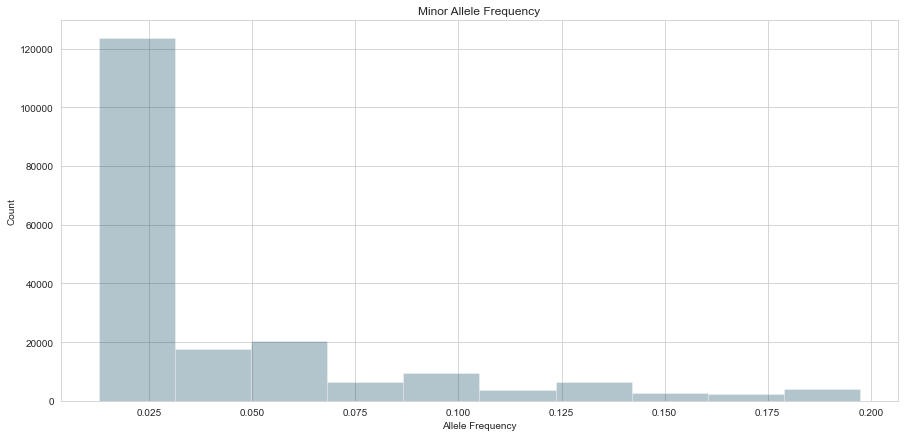

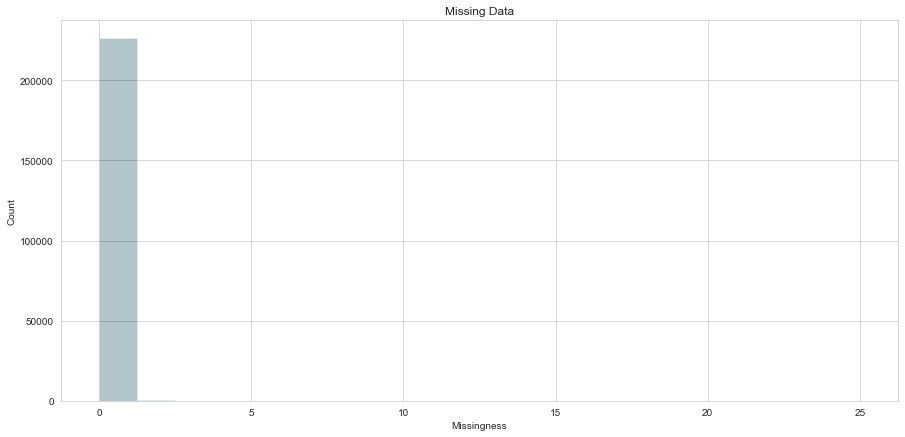

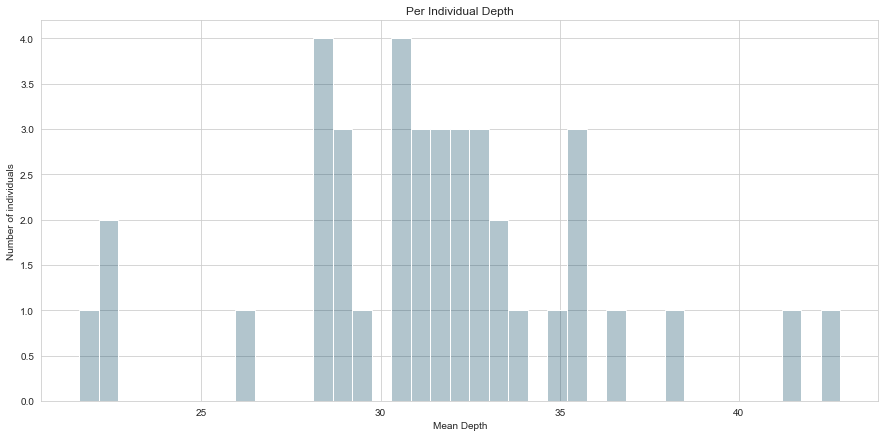

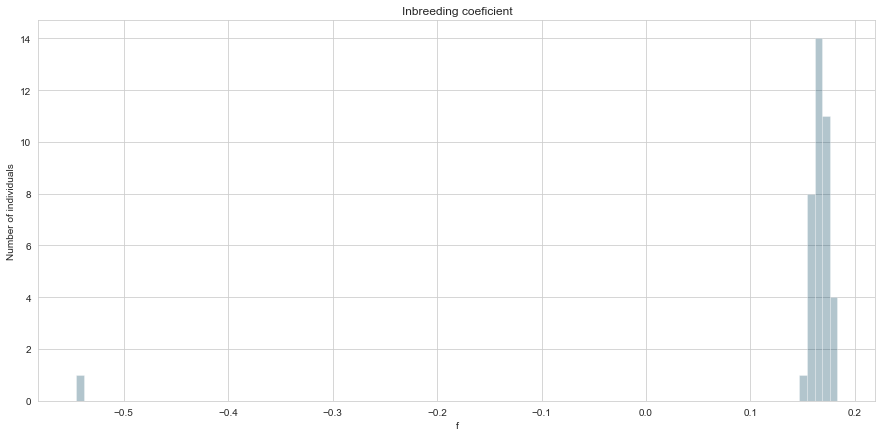

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

#file_paths = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.lqual",
#"/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant.lqual"]

#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.","/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant."]

from_chr=54
till_chr=54
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
 
#List of colors to be used for each plot
color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

# List of labels for each plot
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Full Distribution of Quality Scores")
    sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3,label=label_list[i])

plt.legend()
plt.show()

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Quality Scores below 200")
    qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_qual = np.mean(var_qual["qual"])
    
plt.show()

for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50)
    plt.xlabel("Position")
    plt.ylabel("Count")
    plt.title("Quality Scores Along the Chromosome")
plt.show()    
    
for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth")
plt.show() 

for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_depth = np.mean(var_depth["mean_depth"])
    #print(mean_depth)
    #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth below 200")
plt.show() 


for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Distribution of Allele Frequency")
    plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
    mean_freq = np.mean(var_freq["maf"])
    #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Minor Allele Frequency")
    var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
    plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
    plt.hist(var_miss["nmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
    plt.xlabel("Missingness")
    plt.ylabel("Count")
    plt.title("Missing Data")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
    sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Number of individuals")
    plt.title("Per Individual Depth")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])
    plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
    plt.xlabel("f")
    plt.ylabel("Number of individuals")
    plt.title("Inbreeding coeficient")
plt.show()

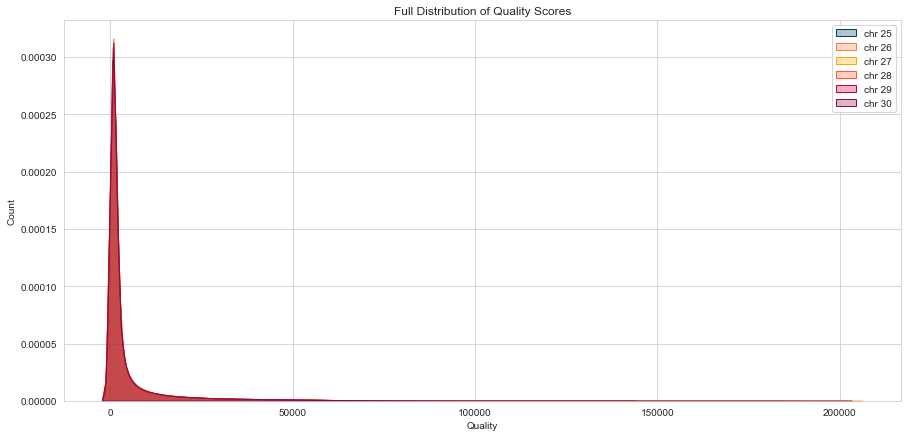

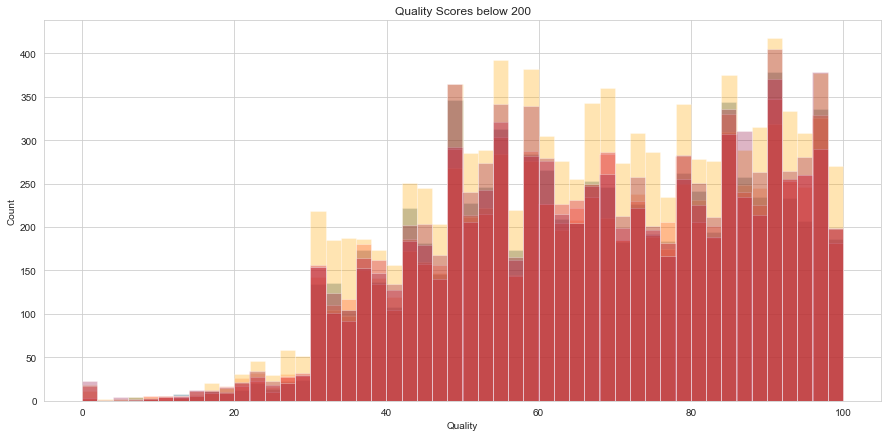

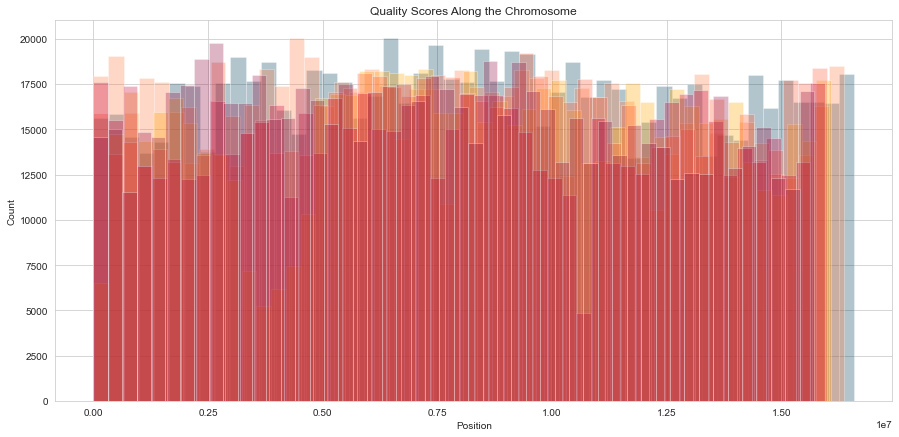

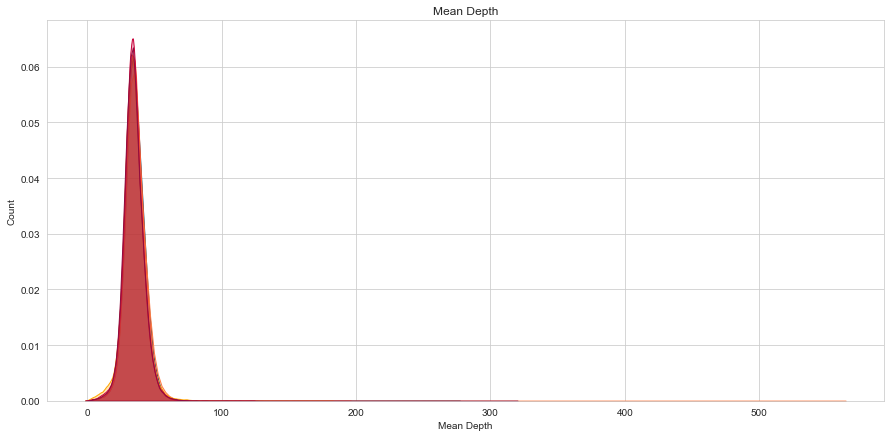

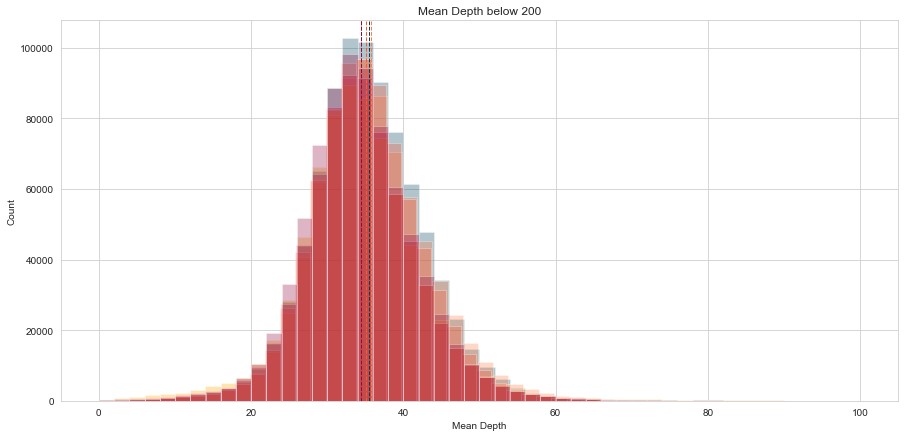

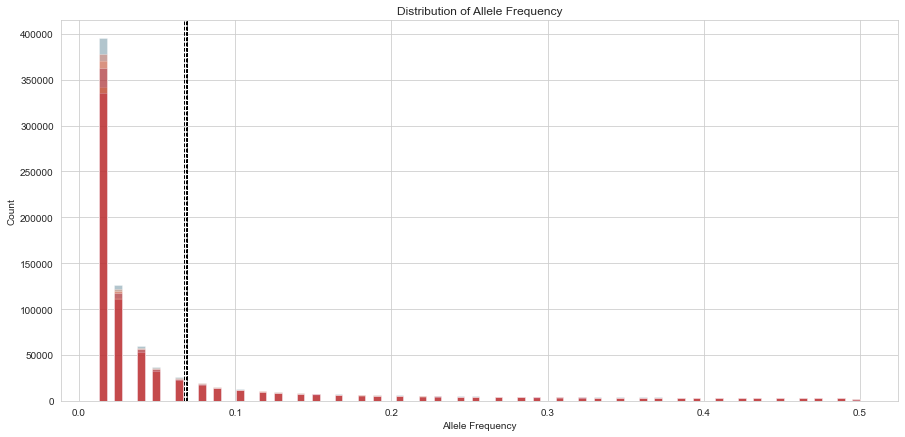

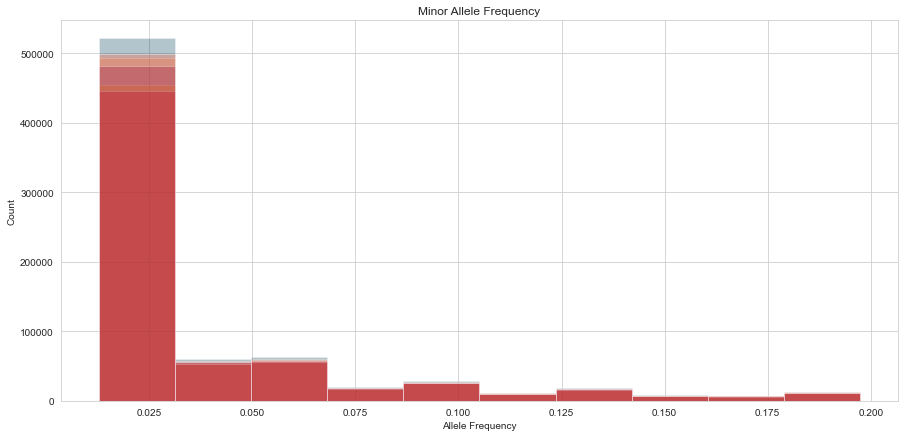

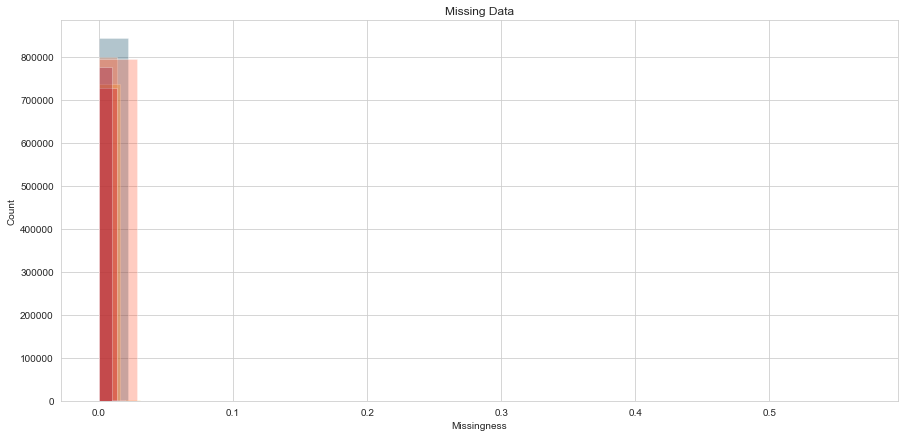

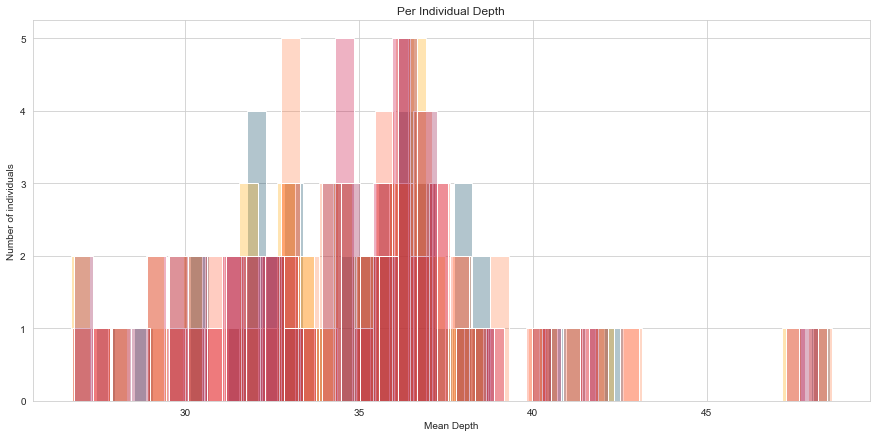

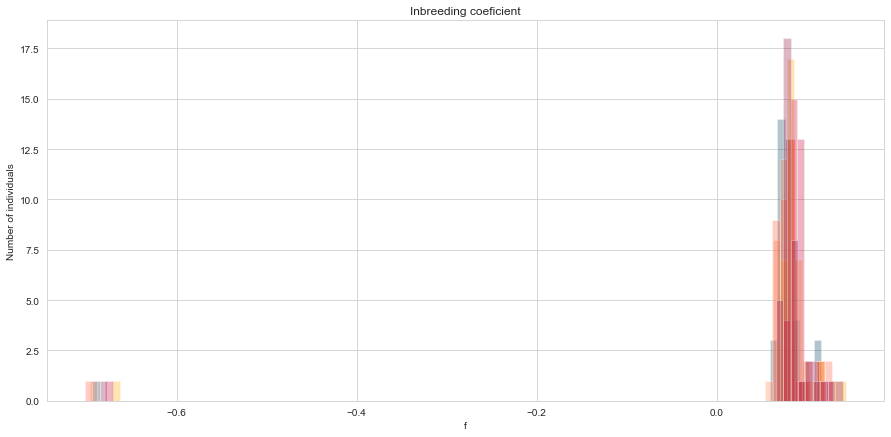

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

#file_paths = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.lqual",
#"/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant.lqual"]

#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.","/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant."]

from_chr=25
till_chr=30
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
 
#List of colors to be used for each plot
color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

# List of labels for each plot
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Full Distribution of Quality Scores")
    sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3,label=label_list[i])

plt.legend()
plt.show()

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Quality Scores below 200")
    qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_qual = np.mean(var_qual["qual"])
    
plt.show()

for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50)
    plt.xlabel("Position")
    plt.ylabel("Count")
    plt.title("Quality Scores Along the Chromosome")
plt.show()    
    
for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth")
plt.show() 

for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_depth = np.mean(var_depth["mean_depth"])
    #print(mean_depth)
    #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth below 200")
plt.show() 


for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Distribution of Allele Frequency")
    plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
    mean_freq = np.mean(var_freq["maf"])
    #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Minor Allele Frequency")
    var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
    plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
    plt.hist(var_miss["fmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
    plt.xlabel("Missingness")
    plt.ylabel("Count")
    plt.title("Missing Data")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
    sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Number of individuals")
    plt.title("Per Individual Depth")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])
    plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
    plt.xlabel("f")
    plt.ylabel("Number of individuals")
    plt.title("Inbreeding coeficient")
plt.show()

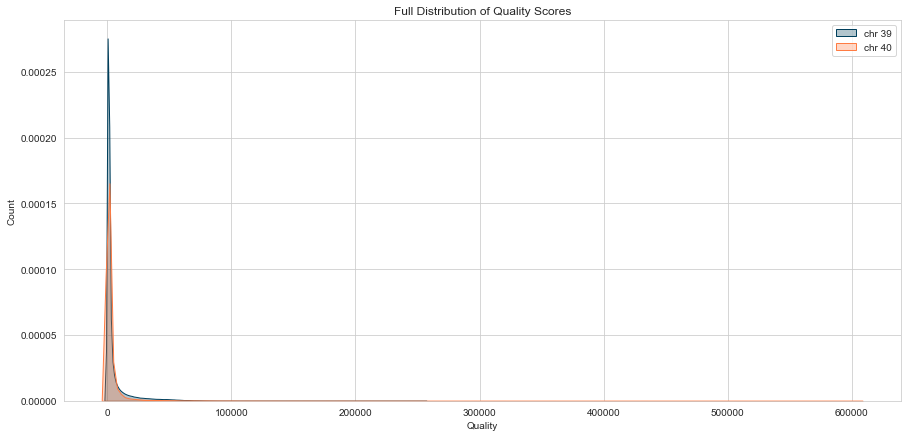

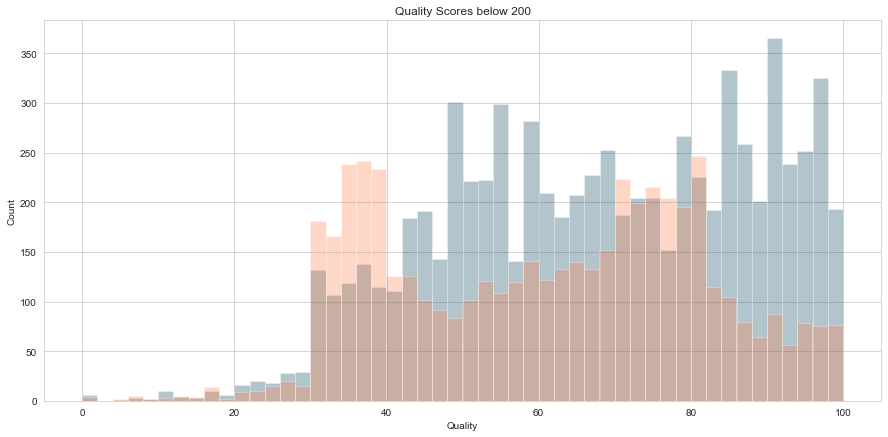

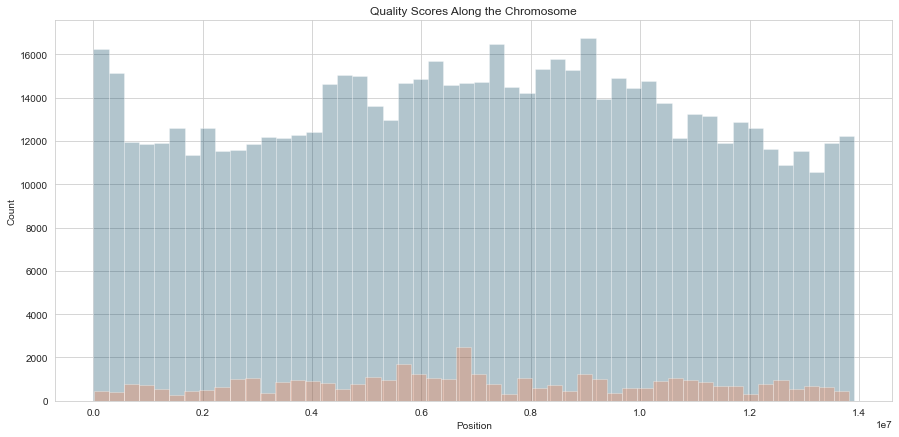

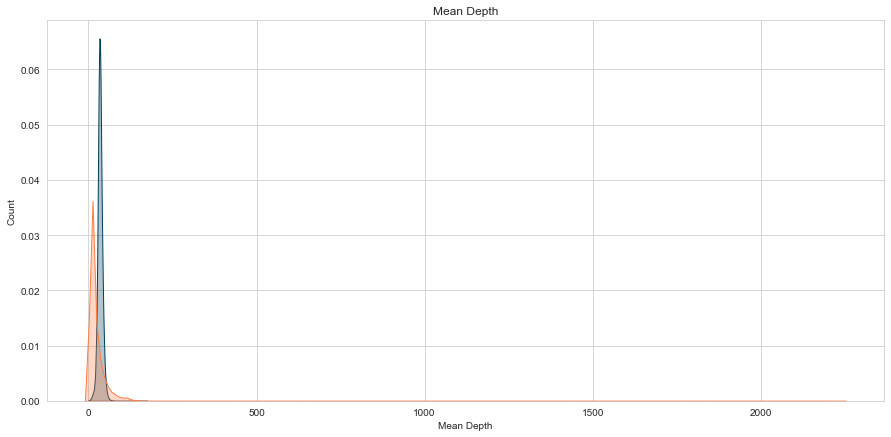

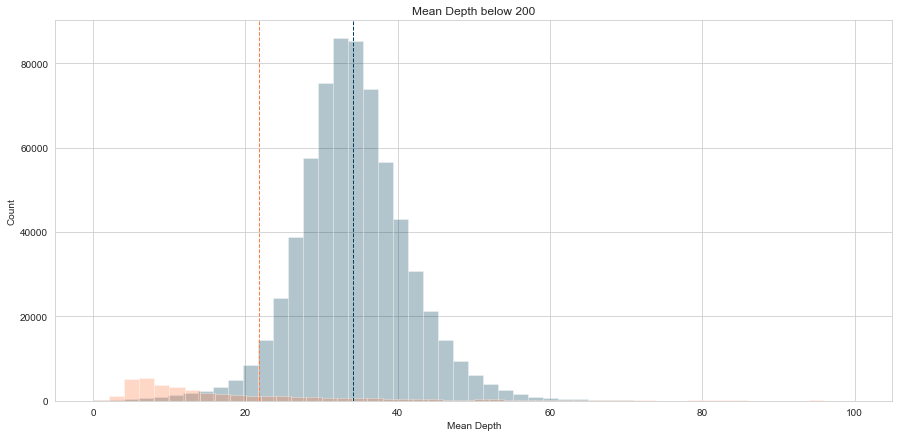

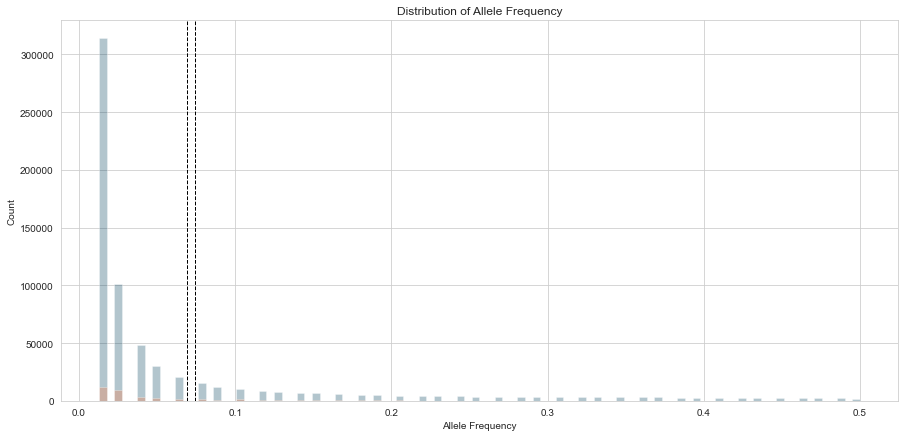

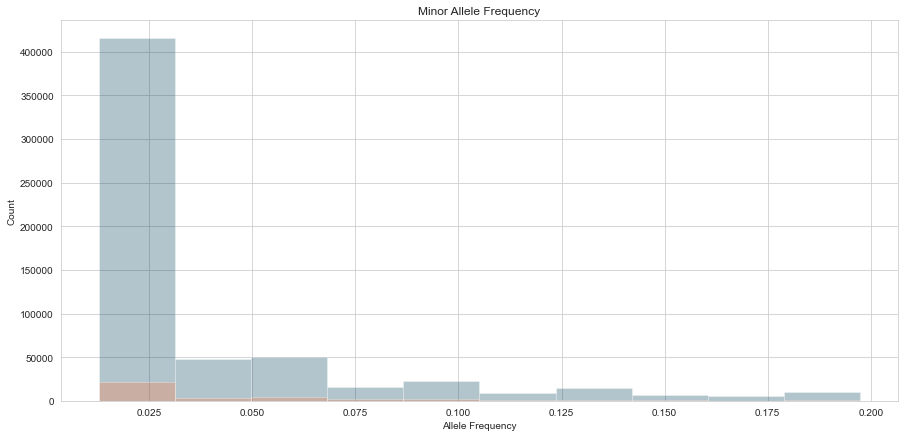

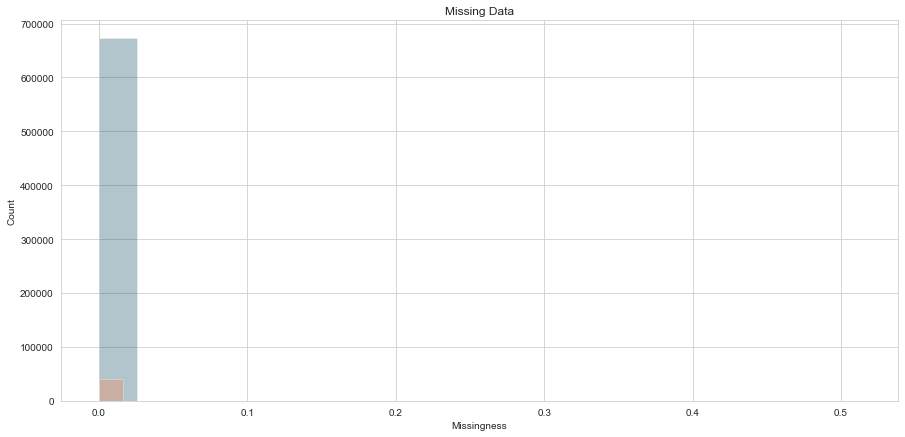

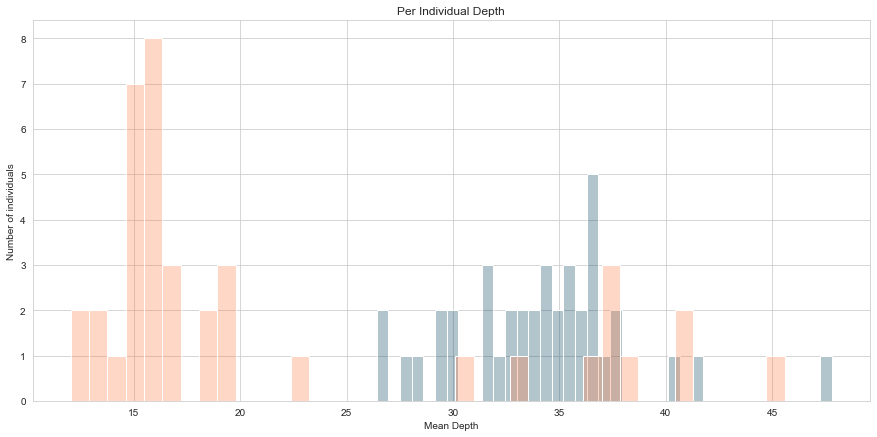

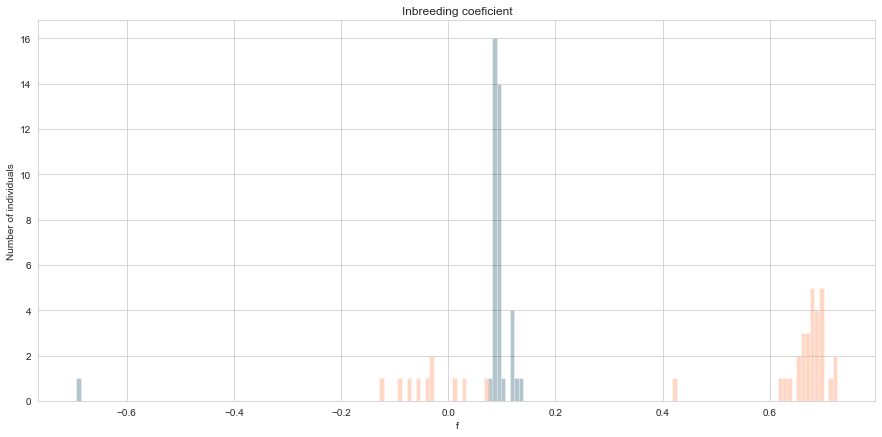

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

#file_paths = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.lqual",
#"/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant.lqual"]

#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.","/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant."]

from_chr=39
till_chr=40
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
 
#List of colors to be used for each plot
color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

# List of labels for each plot
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Full Distribution of Quality Scores")
    sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3,label=label_list[i])

plt.legend()
plt.show()

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Quality Scores below 200")
    qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_qual = np.mean(var_qual["qual"])
    
plt.show()

for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50)
    plt.xlabel("Position")
    plt.ylabel("Count")
    plt.title("Quality Scores Along the Chromosome")
plt.show()    
    
for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth")
plt.show() 

for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_depth = np.mean(var_depth["mean_depth"])
    #print(mean_depth)
    #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth below 200")
plt.show() 


for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Distribution of Allele Frequency")
    plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
    mean_freq = np.mean(var_freq["maf"])
    #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Minor Allele Frequency")
    var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
    plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
    plt.hist(var_miss["fmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
    plt.xlabel("Missingness")
    plt.ylabel("Count")
    plt.title("Missing Data")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
    sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Number of individuals")
    plt.title("Per Individual Depth")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])
    plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
    plt.xlabel("f")
    plt.ylabel("Number of individuals")
    plt.title("Inbreeding coeficient")
plt.show()

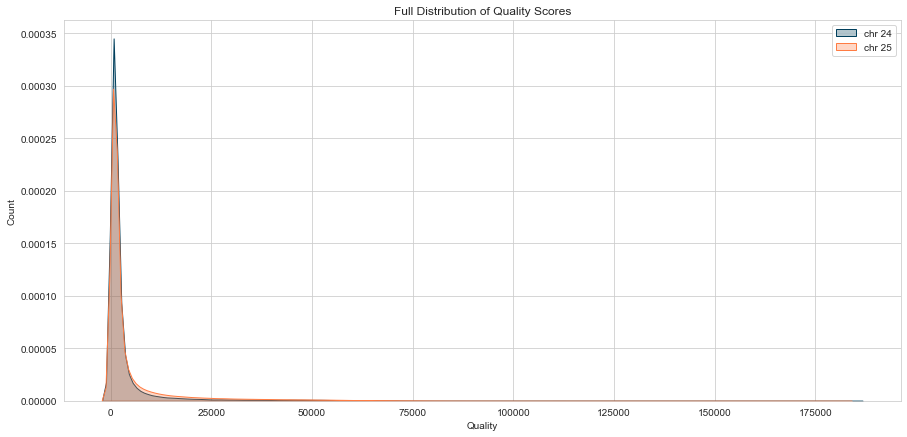

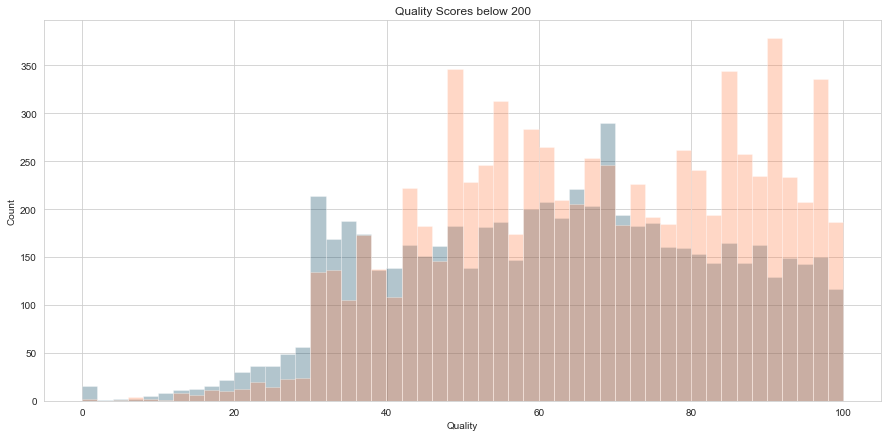

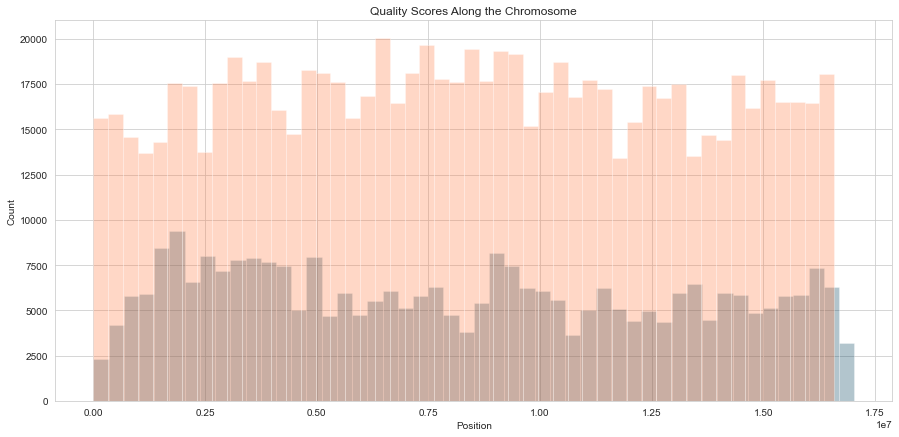

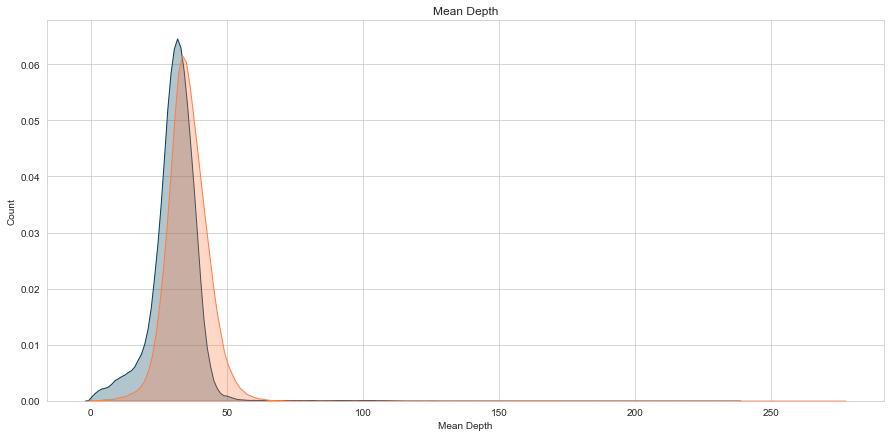

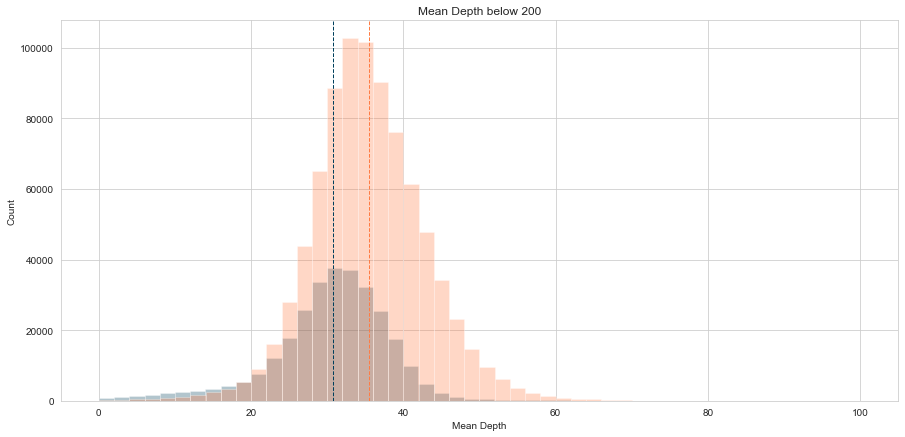

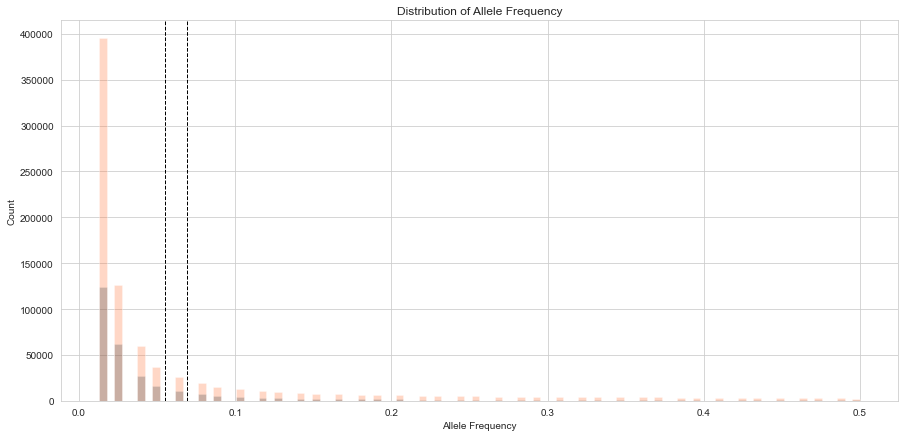

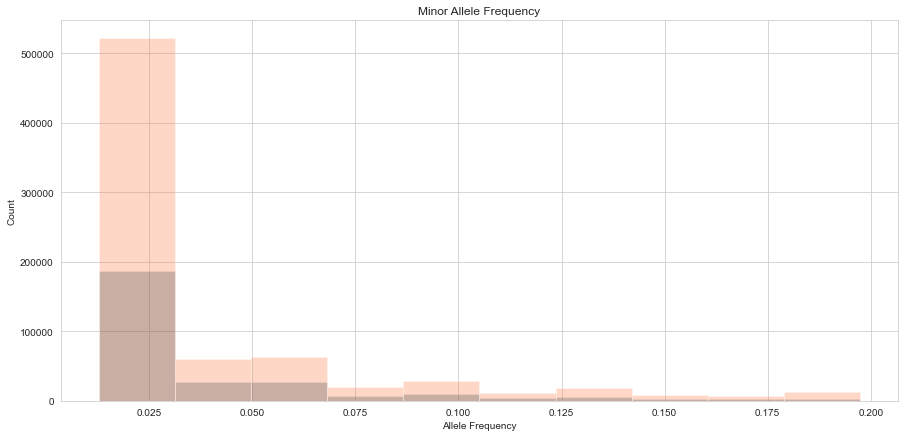

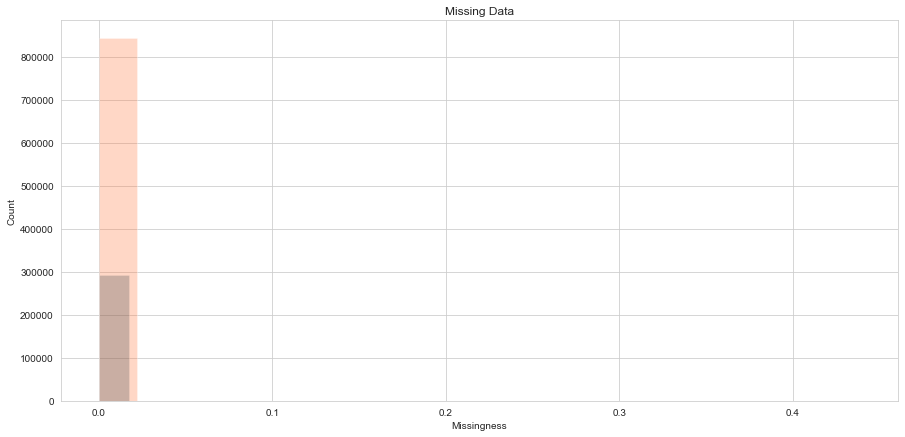

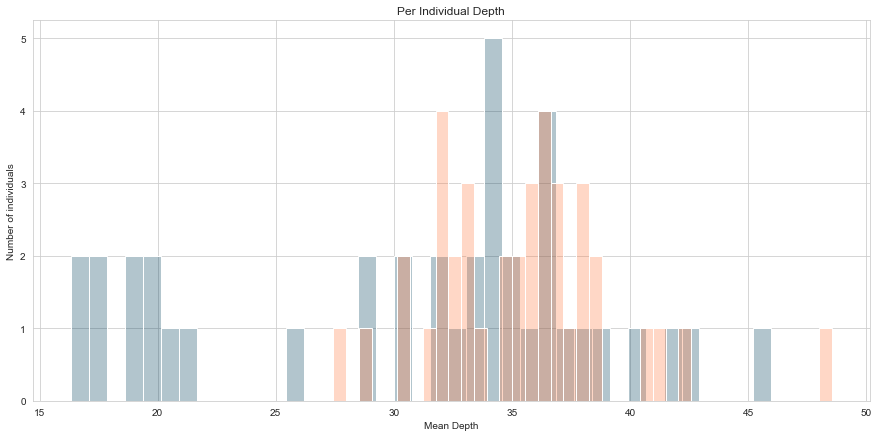

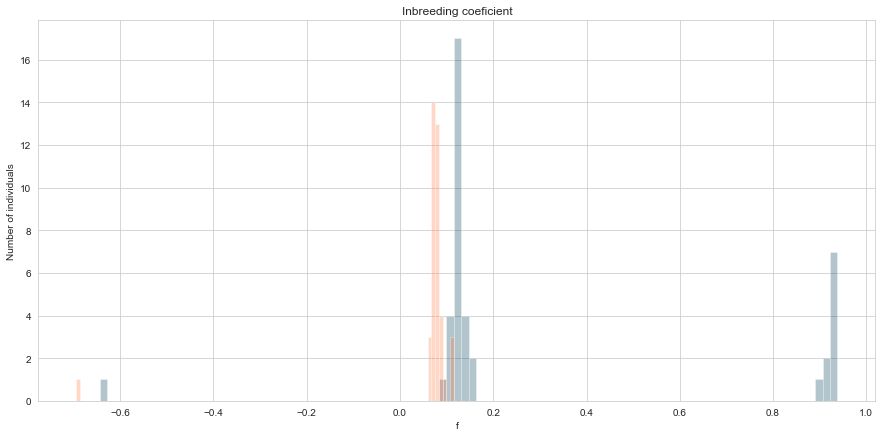

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

#file_paths = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.lqual",
#"/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant.lqual"]

#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.","/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant."]

from_chr=24
till_chr=25
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
 
#List of colors to be used for each plot
color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

# List of labels for each plot
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Full Distribution of Quality Scores")
    sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3,label=label_list[i])

plt.legend()
plt.show()

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Quality Scores below 200")
    qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_qual = np.mean(var_qual["qual"])
    
plt.show()

for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50)
    plt.xlabel("Position")
    plt.ylabel("Count")
    plt.title("Quality Scores Along the Chromosome")
plt.show()    
    
for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth")
plt.show() 

for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_depth = np.mean(var_depth["mean_depth"])
    #print(mean_depth)
    #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth below 200")
plt.show() 


for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Distribution of Allele Frequency")
    plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
    mean_freq = np.mean(var_freq["maf"])
    #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Minor Allele Frequency")
    var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
    plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
    plt.hist(var_miss["fmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
    plt.xlabel("Missingness")
    plt.ylabel("Count")
    plt.title("Missing Data")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
    sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Number of individuals")
    plt.title("Per Individual Depth")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])
    plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
    plt.xlabel("f")
    plt.ylabel("Number of individuals")
    plt.title("Inbreeding coeficient")
plt.show()

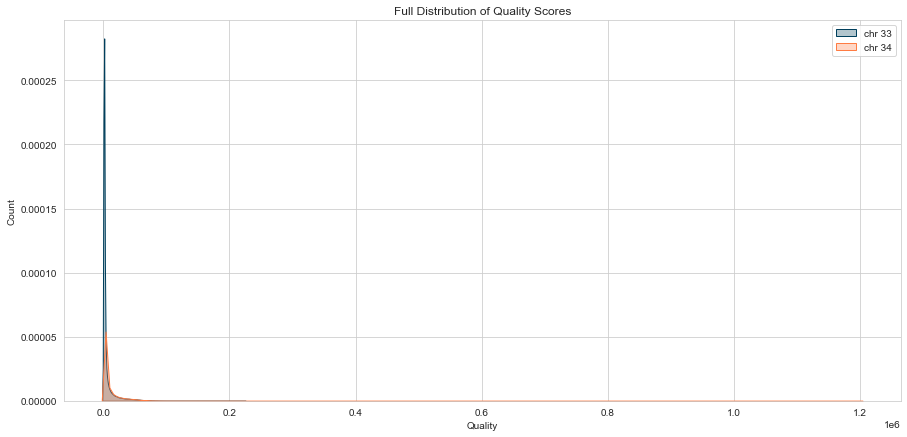

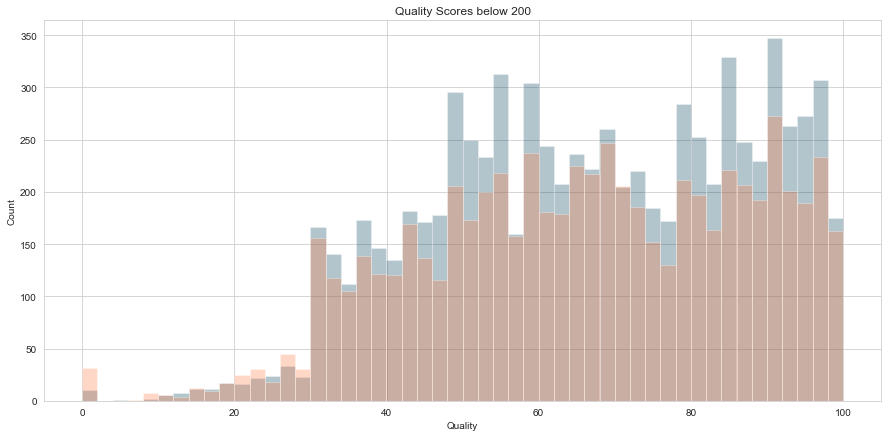

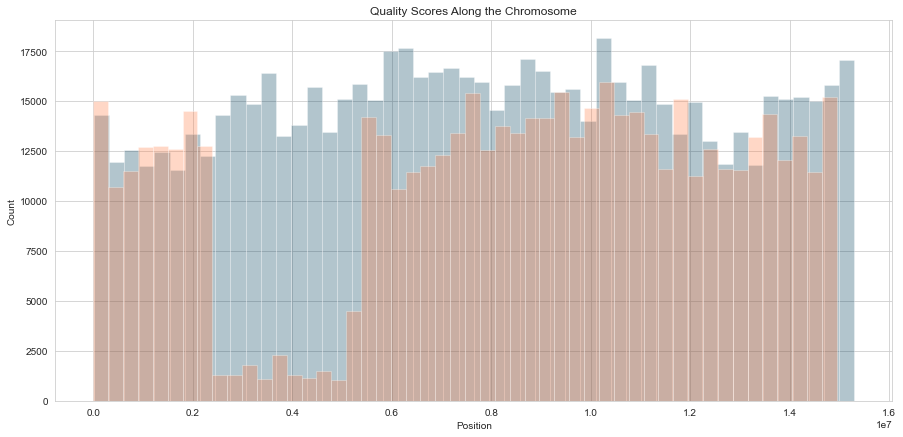

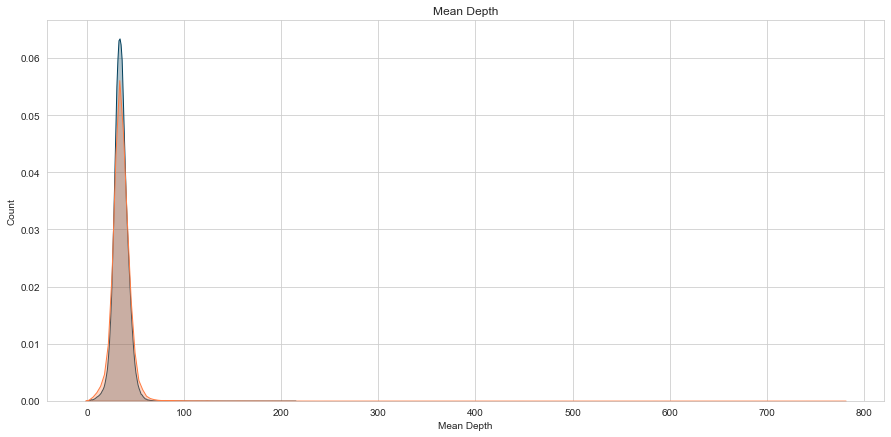

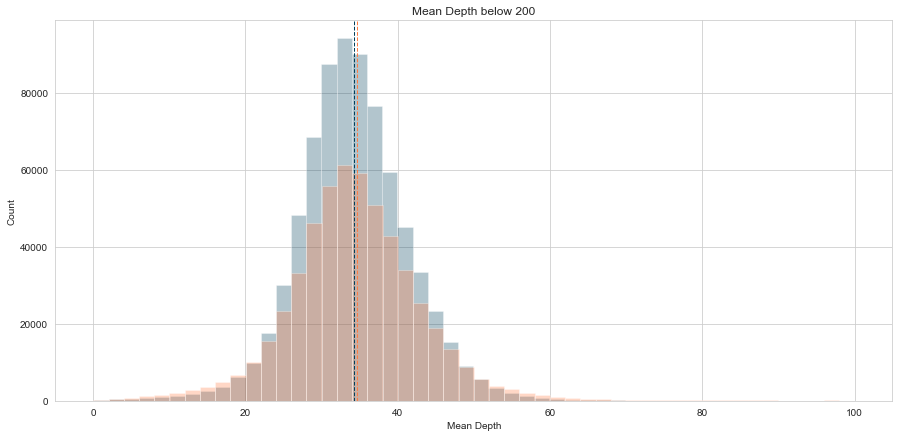

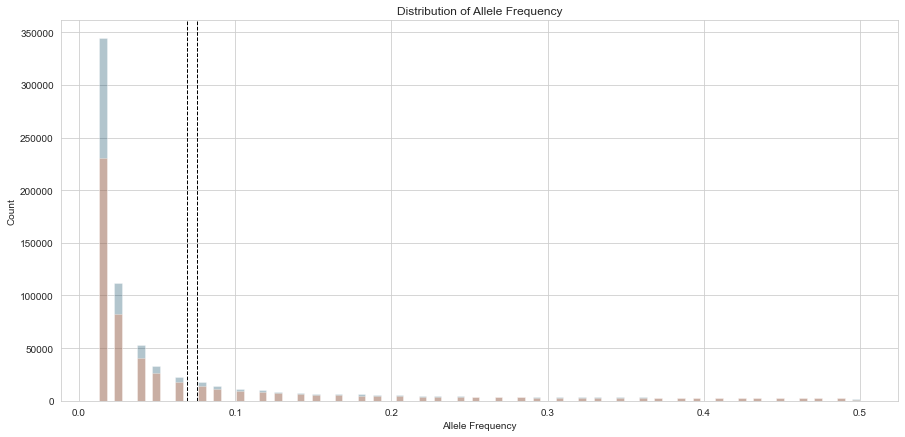

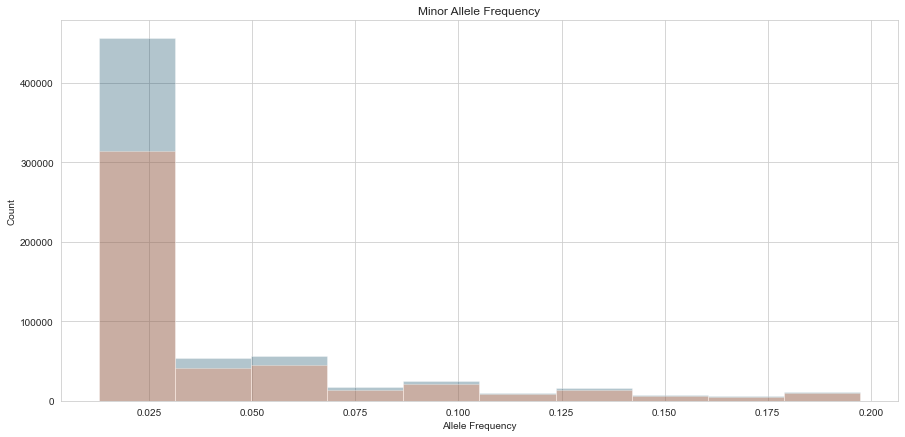

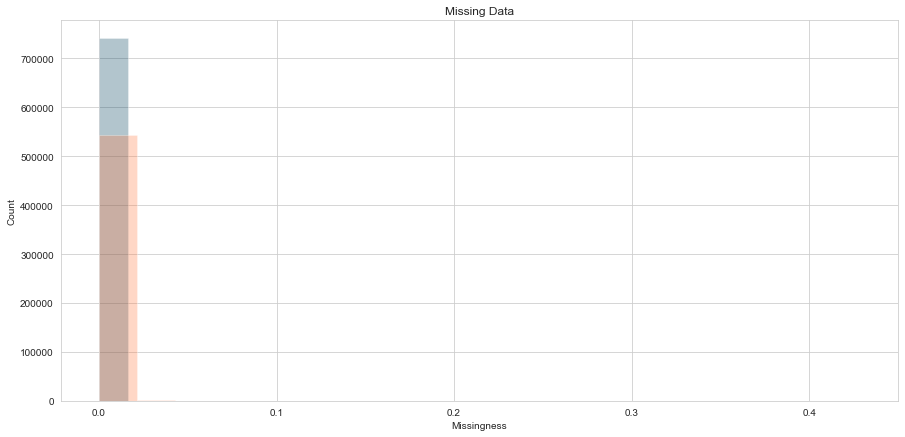

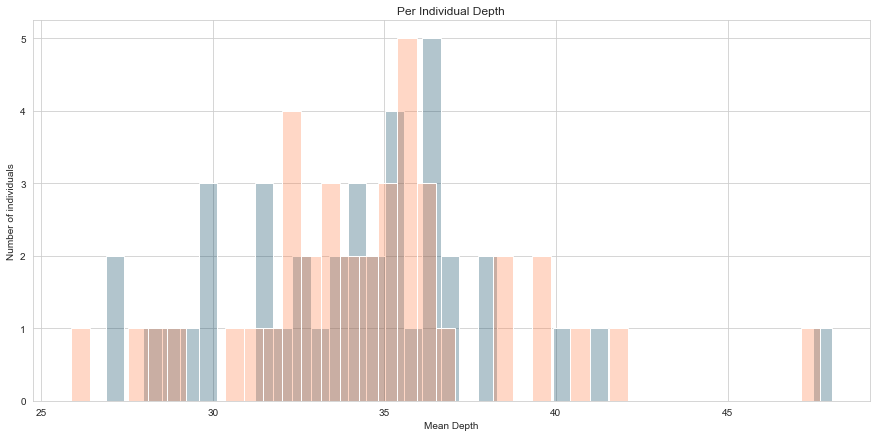

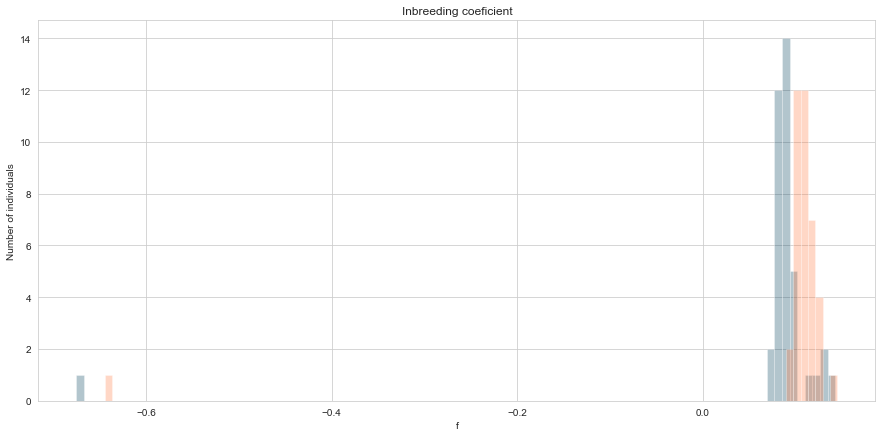

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

#file_paths = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.lqual",
#"/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant.lqual"]

#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.","/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant."]

from_chr=33
till_chr=34
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
 
#List of colors to be used for each plot
color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

# List of labels for each plot
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Full Distribution of Quality Scores")
    sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3,label=label_list[i])

plt.legend()
plt.show()

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Quality Scores below 200")
    qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_qual = np.mean(var_qual["qual"])
    
plt.show()

for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50)
    plt.xlabel("Position")
    plt.ylabel("Count")
    plt.title("Quality Scores Along the Chromosome")
plt.show()    
    
for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth")
plt.show() 

for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_depth = np.mean(var_depth["mean_depth"])
    #print(mean_depth)
    #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth below 200")
plt.show() 


for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Distribution of Allele Frequency")
    plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
    mean_freq = np.mean(var_freq["maf"])
    #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Minor Allele Frequency")
    var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
    plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
    plt.hist(var_miss["fmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
    plt.xlabel("Missingness")
    plt.ylabel("Count")
    plt.title("Missing Data")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
    sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Number of individuals")
    plt.title("Per Individual Depth")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])
    plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
    plt.xlabel("f")
    plt.ylabel("Number of individuals")
    plt.title("Inbreeding coeficient")
plt.show()

In [34]:
["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR99995{}_variant.".format(i) for i in range(24, 56)]


['/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999524_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999525_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999526_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999527_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999528_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999529_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999530_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999531_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999532_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999533_variant.',
 '/Users/dshipilina/GitHub/Van

### Polished

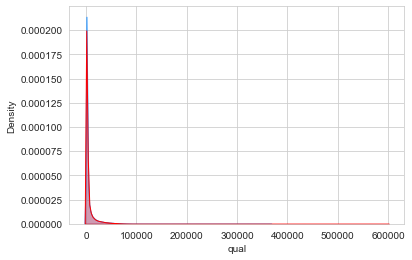

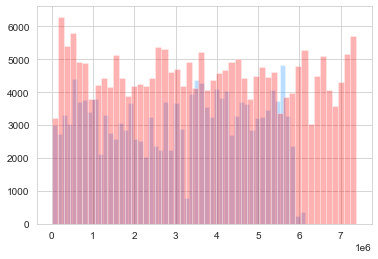

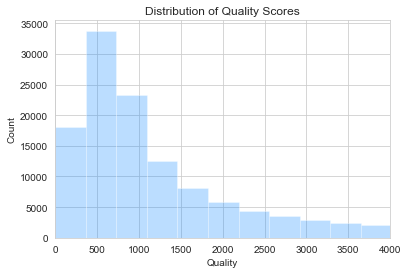

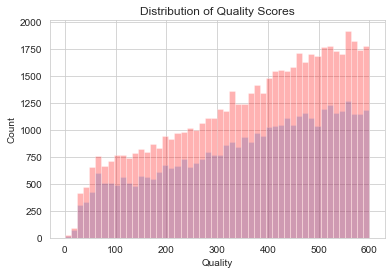

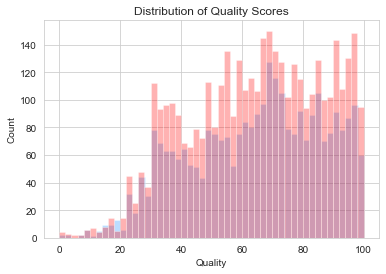

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files
var_qual = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.lqual", sep="\t", skiprows=1,
                        names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

var_qual4 = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant.lqual", sep="\t", skiprows=1,
                        names=["chr", "pos", "qual"])
var_qual4 = var_qual4[var_qual4["qual"] != -1]
var_qual4 = var_qual4.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

# Plotting the data using seaborn and matplotlib
sns.set_style("whitegrid")

sns.kdeplot(data=var_qual, x="qual", fill=True, color="dodgerblue", alpha=0.3)
sns.kdeplot(data=var_qual4, x="qual", fill=True, color="red", alpha=0.3)
plt.show()

plt.hist(var_qual['pos'], fill=True, color="dodgerblue", alpha=0.3, bins=50)
plt.hist(var_qual4['pos'], fill=True, color="red", alpha=0.3, bins=50)
plt.show()

plt.hist(var_qual['qual'], fill=True, color="dodgerblue", alpha=0.3, bins=1000)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores")
plt.xlim(0, 4000) # set x-axis limit to 0-300
plt.show()

qual_lt_400 = var_qual[var_qual["qual"] < 600] # create a new dataset with only "qual" values < 400
plt.hist(qual_lt_400["qual"], fill=True, color="dodgerblue", alpha=0.3, bins=50)
qual_lt_4004 = var_qual4[var_qual4["qual"] < 600] # create a new dataset with only "qual" values < 400
plt.hist(qual_lt_4004["qual"], fill=True, color="red", alpha=0.3, bins=50)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores")
#plt.xlim(0, 50) # set x-axis limit to 0-300
plt.show()

qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
plt.hist(qual_lt_400["qual"], fill=True, color="dodgerblue", alpha=0.3, bins=50)
qual_lt_4004 = var_qual4[var_qual4["qual"] < 100] # create a new dataset with only "qual" values < 400
plt.hist(qual_lt_4004["qual"], fill=True, color="red", alpha=0.3, bins=50)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores")
#plt.xlim(0, 50) # set x-axis limit to 0-300ls

plt.show()

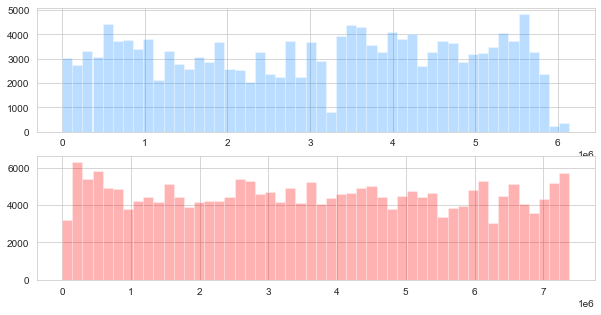

In [16]:
import matplotlib.pyplot as plt

# Create a figure object and a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))


# Plot the first histogram in the first subplot
axs[0].hist(var_qual['pos'], fill=True, color="dodgerblue", alpha=0.3, bins=50)
#axs[0].set_title('Histogram 1')

# Plot the second histogram in the second subplot
axs[1].hist(var_qual4['pos'], fill=True, color="red", alpha=0.3, bins=50)
#axs[1].set_title('Histogram 2')

# Display the plot
plt.show()


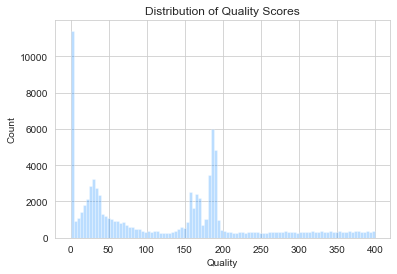

In [58]:
qual_lt_400 = var_qual[(var_qual["qual"] < 400) & (var_qual["qual"] > 0)] # create a new dataset with only "qual" values < 400
plt.hist(qual_lt_400["qual"], fill=True, color="dodgerblue", alpha=0.3, bins=100)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores")
#plt.xlim(0, 50) # set x-axis limit to 0-300
plt.show()

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files
var_qual = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.lqual.tsv", sep="\t", skiprows=1,
                        names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

var_miss= pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.lmiss", sep="\t", skiprows=1,
                        names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])

#var_qual = var_qual[var_qual["qual"] != -1]
#var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")



In [61]:
var_miss

,chr,pos,nchr,nfiltered,nmiss,fmiss
0,LR999955.1,1,78,0,0,0.0
1,LR999955.1,2,78,0,0,0.0
2,LR999955.1,3,78,0,0,0.0
3,LR999955.1,4,78,0,0,0.0
4,LR999955.1,5,78,0,0,0.0
...,...,...,...,...,...,...
1782178,LR999955.1,6165012,78,0,0,0.0
1782179,LR999955.1,6165013,78,0,0,0.0
1782180,LR999955.1,6165014,78,0,0,0.0
1782181,LR999955.1,6165015,78,0,0,0.0


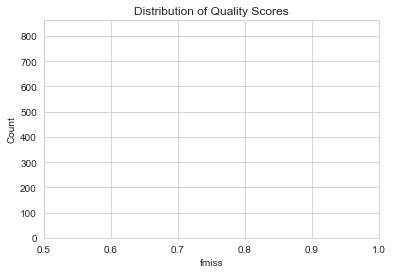

In [79]:
var_miss_400 = var_miss[(var_miss["fmiss"] > 0)& (var_miss["fmiss"] < 1)]
#var_miss_400 = var_miss[var_miss["fmiss"] > 0]# create a new dataset with only "qual" values < 400
plt.hist(var_miss_400["fmiss"], fill=True, color="dodgerblue", alpha=0.3, bins=50)
plt.xlabel("fmiss")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores")
plt.xlim(0.5, 1) # set x-axis limit to 0-300
plt.show()

In [46]:
var_qual[var_qual["qual"] < 400]

,chr,pos,qual
16,LR999955.1,17,0.29
19,LR999955.1,20,26.81
27,LR999955.1,32,0.00
28,LR999955.1,34,0.00
31,LR999955.1,41,0.16
...,...,...,...
1782024,LR999955.1,6164029,25.92
1782036,LR999955.1,6164041,18.29
1782042,LR999955.1,6164047,23.63
1782043,LR999955.1,6164048,20.19


ValueError: supplied range of [0.0, inf] is not finite

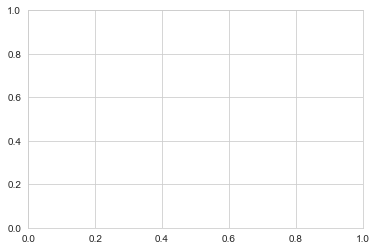

In [18]:
plt.hist(var_qual["qual"], bins=50)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores")
plt.show()

In [20]:
stats.var_qual["qual"]

NameError: name 'stats' is not defined

In [28]:
import numpy as np

mean = np.mean(var_qual["qual"])
median = np.median(var_qual["qual"])
std = np.std(var_qual["qual"])
minimum = np.min(var_qual["qual"])
maximum = np.max(var_qual["qual"])

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)
print("Minimum Value:", minimum)
print("Maximum Value:", maximum)

Mean: 2055.498378956994
Median: 0.01
Standard Deviation: 7817.679117606023
Minimum Value: 0.0
Maximum Value: 364896.0


In [27]:
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

In [68]:
mean = np.mean(var_miss_400["fmiss"])
median = np.median(var_miss_400["fmiss"])
std = np.std(var_miss_400["fmiss"])
minimum = np.min(var_miss_400["fmiss"])
maximum = np.max(var_miss_400["fmiss"])

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)
print("Minimum Value:", minimum)
print("Maximum Value:", maximum)

Mean: 0.9944806061576752
Median: 1.0
Standard Deviation: 0.07325205491497021
Minimum Value: 0.012987
Maximum Value: 1.0
